# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Team Member 1 -*  - Manish Patel

# **Project Summary -**

**This project is on the prediction of Bike Rental Demand in Seoul(South Korea).The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.This project is based on supervised learning approach regrssion problem.It follows all the assumptions of regression model.The dependent variable is of course the Rented Bike Count and other features are independent variables.
There are several steps in completing this project.First checked the distribution of data and find the symmetricity and skewness and take corrective measures.
Then ckecked for outliers and deal with them.After dealing with multicollinerity and done with scaling divide the dataset into train test and fit into Linear Regression model,Ridge Regression,Lasso Regression and Random Forest Regressor and check their results using different Evaluation metrics.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import warnings
import warnings
warnings.filterwarnings('ignore')

# Import preporcessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import model selection libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

# Import Outlier influence library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path ='/content/drive/MyDrive/ almabetter csv file/SeoulBikeData.csv'

In [ ]:
df1=pd.read_csv(file_path,  encoding= 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
df1.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df1.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df1[df1.duplicated()].shape

(0, 14)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df1.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

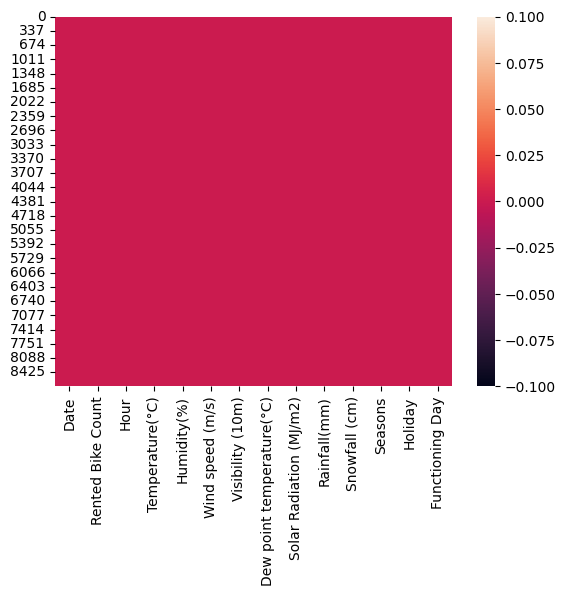

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(data=df1.isnull(),)

### What did you know about your dataset?

>This dataset belongs to bike sharing demand information so we have to find insights from this data about the predicted demand of bikes for rent.

>There are 8760 rows and 14 columns. There are no duplicate and null values in the dataset.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df1.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df1.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

**The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**
* Date: Date of when bike is rent out

* Rented Bike Count: Total Bike rent out(Target feature)

* Hour:Bike rent out in which hour of day(0-23)

* Temperature(°C):Temp of the bike rent out day in centigrade

* Humidity(%):Humidity on that day in %age form

* Solar Radiation (MJ/m2):Solar radiation measure on that day

* Rainfall:Rain fall on that day

* Snowfall:Snow fall on that day

* Seasons:Contains season info(Spring,Summer,Autumn,Winter)

* Holiday:that day was a public holiday or not(excluding weekends i.e. Saturday and Sundays)

* Functioning day:That day was a working day or not.

* Wind Speed: Wind Speed on that day

* Visibility: Maximum visibility(per 10 m)

* Dew Point Temperature: Dew point Temp (degree C)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df1.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#creating a copy of dataset
df=df1.copy()

In [ ]:
# Renaming the columns
df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [ ]:
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [ ]:
# converting date variable in to datetime datatype
df['date'] = df['date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [ ]:
# Creating new columns for day and month
df['month'] = df['date'].apply(lambda x : x.month)
df['day_of_week'] = df['date'].apply(lambda x : x.isoweekday())

In [ ]:
# engineering new feature 'weekend' from day_of_week
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x>5 else 0)


In [ ]:
df.describe(include='all')

date  rented_bike_count         hour  temperature  \
count                  8760        8760.000000  8760.000000  8760.000000   
unique                  365                NaN          NaN          NaN   
top     2017-12-01 00:00:00                NaN          NaN          NaN   
freq                     24                NaN          NaN          NaN   
first   2017-12-01 00:00:00                NaN          NaN          NaN   
last    2018-11-30 00:00:00                NaN          NaN          NaN   
mean                    NaN         704.602055    11.500000    12.882922   
std                     NaN         644.997468     6.922582    11.944825   
min                     NaN           0.000000     0.000000   -17.800000   
25%                     NaN         191.000000     5.750000     3.500000   
50%                     NaN         504.500000    11.500000    13.700000   
75%                     NaN        1065.250000    17.250000    22.500000   
max                     NaN        3556.000000    23.000000    39.400000   

           humidity   wind_speed   visibility  dew_point_temp  \
count   8760.000000  8760.000000  8760.000000     8760.000000   
unique          NaN          NaN          NaN             NaN   
top             NaN          NaN          NaN             NaN   
freq            NaN          NaN          NaN             NaN   
first           NaN          NaN          NaN             NaN   
last            NaN          NaN          NaN             NaN   
mean      58.226256     1.724909  1436.825799        4.073813   
std       20.362413     1.036300   608.298712       13.060369   
min        0.000000     0.000000    27.000000      -30.600000   
25%       42.000000     0.900000   940.000000       -4.700000   
50%       57.000000     1.500000  1698.000000        5.100000   
75%       74.000000     2.300000  2000.000000       14.800000   
max       98.000000     7.400000  2000.000000       27.200000   

        solar_radiation     rainfall     snowfall seasons     holiday  \
count       8760.000000  8760.000000  8760.000000    8760        8760   
unique              NaN          NaN          NaN       4           2   
top                 NaN          NaN          NaN  Spring  No Holiday   
freq                NaN          NaN          NaN    2208        8328   
first               NaN          NaN          NaN     NaN         NaN   
last                NaN          NaN          NaN     NaN         NaN   
mean           0.569111     0.148687     0.075068     NaN         NaN   
std            0.868746     1.128193     0.436746     NaN         NaN   
min            0.000000     0.000000     0.000000     NaN         NaN   
25%            0.000000     0.000000     0.000000     NaN         NaN   
50%            0.010000     0.000000     0.000000     NaN         NaN   
75%            0.930000     0.000000     0.000000     NaN         NaN   
max            3.520000    35.000000     8.800000     NaN         NaN   

       func_day        month  day_of_week      weekend  
count      8760  8760.000000  8760.000000  8760.000000  
unique        2          NaN          NaN          NaN  
top         Yes          NaN          NaN          NaN  
freq       8465          NaN          NaN          NaN  
first       NaN          NaN          NaN          NaN  
last        NaN          NaN          NaN          NaN  
mean        NaN     6.526027     4.002740     0.284932  
std         NaN     3.448048     1.998056     0.451408  
min         NaN     1.000000     1.000000     0.000000  
25%         NaN     4.000000     2.000000     0.000000  
50%         NaN     7.000000     4.000000     0.000000  
75%         NaN    10.000000     6.000000     1.000000  
max         NaN    12.000000     7.000000     1.000000

In [ ]:
# defining continuous independent variables separately
cont_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp','solar_radiation', 'rainfall', 'snowfall']

In [ ]:
# defining dependent variable
dependent_variable = ['rented_bike_count']

In [ ]:
# defining categorical independent variables separately
cat_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

### What all manipulations have you done and insights you found?

* From the Date column, 'month' and 'day of the week' columns are created.
* From the day of the week column, weekend column is created where 6 and 7 are the weekends (Saturday and Sunday).
* We have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Dependent variable Distribution.

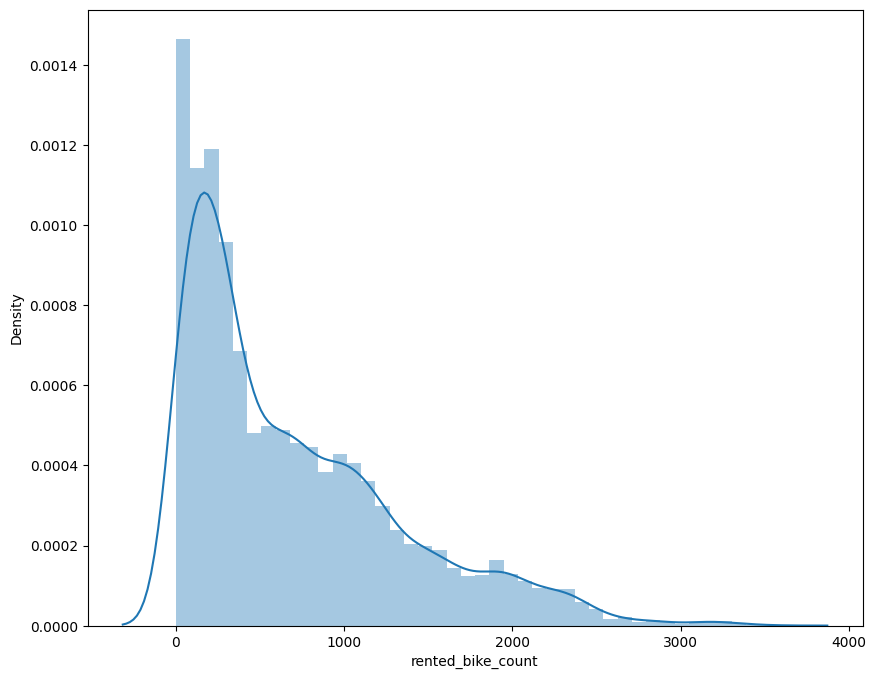

In [ ]:
# Chart - 1 visualization code for distribution of target variable
plt.figure(figsize=(10,8))
sns.distplot(df['rented_bike_count'])
plt.show()

##### 1. Why did you pick the specific chart?

A distplot, also known as a histogram-kernel density estimate (KDE) plot. It is useful because it provides a quick and easy way to check the distribution of the data, identify patterns or outliers, and compare the distribution of multiple variables. It also allows to check if the data is following normal distribution or not.

Thus, I used the histogram plot to analyse the variable distributions over the whole dataset whether it's symmetric or not.



##### 2. What is/are the insight(s) found from the chart?

From above distribution plot of dependent variable rented bike, we can clearly see that the distribution is positively skewed (Right skewed).

It means that distribution is not symmetric around the the mean.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definately from this insight we got to know that we our data is not normally distributed so, before doing or implementing any model on this data we need to normalise this data.

#### Chart - 2 Distribution/ Box plot

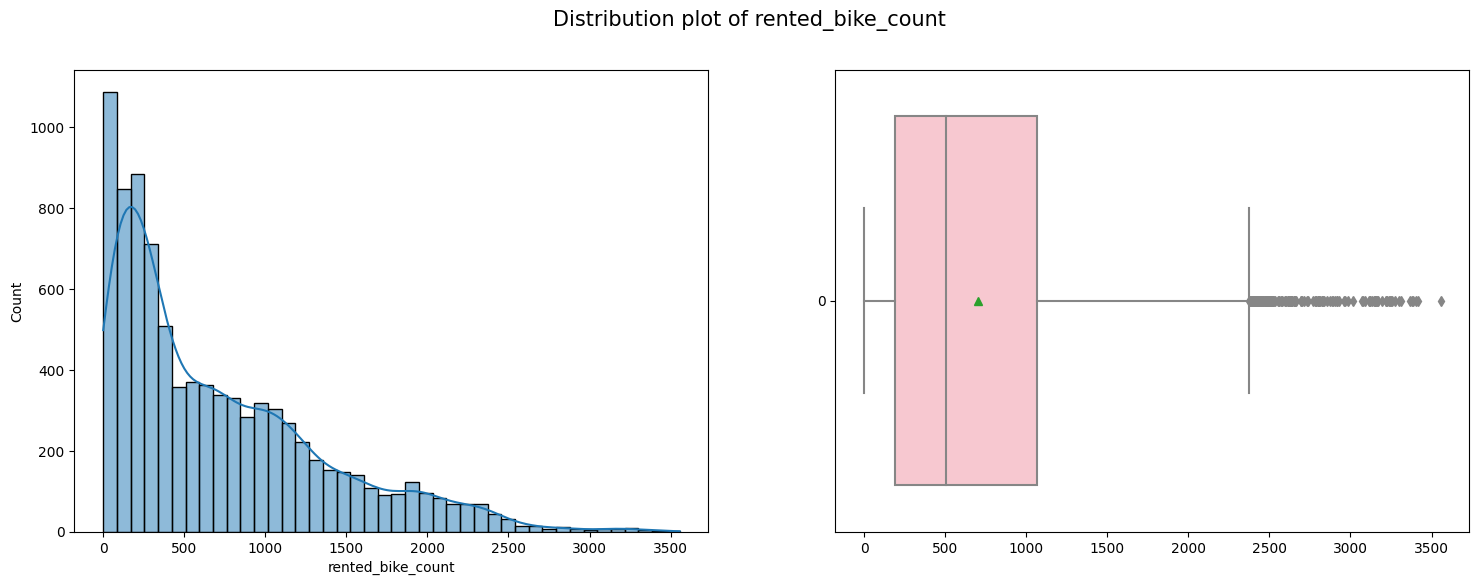

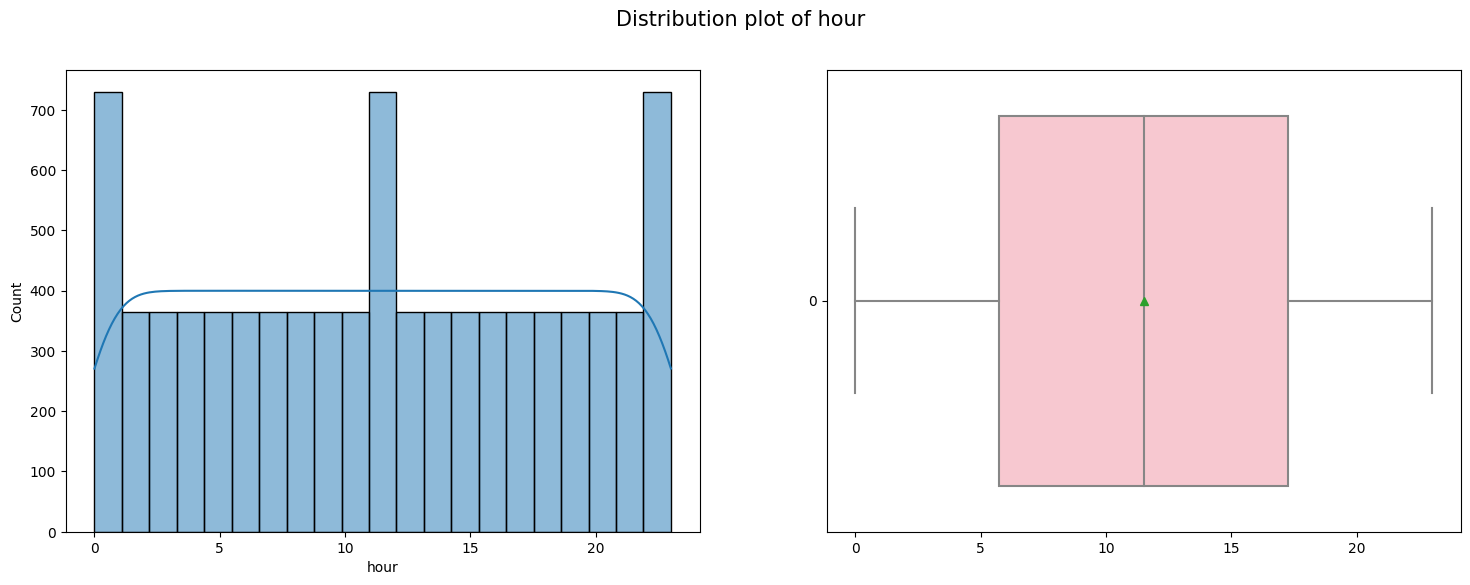

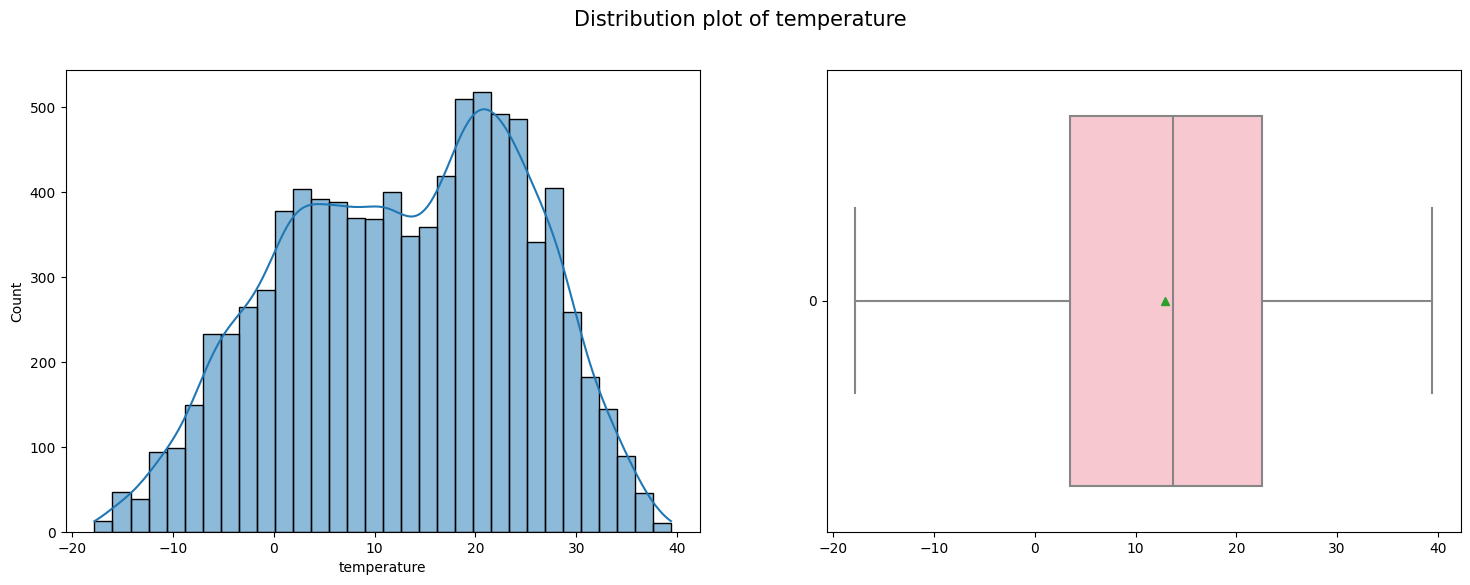

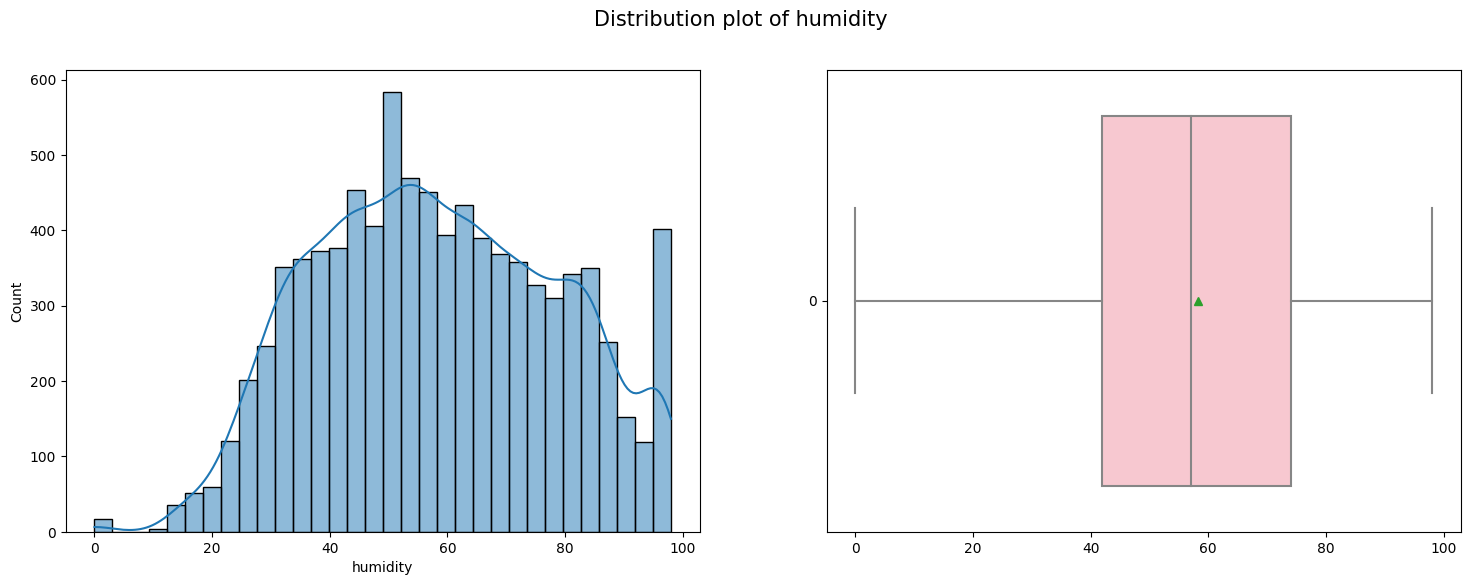

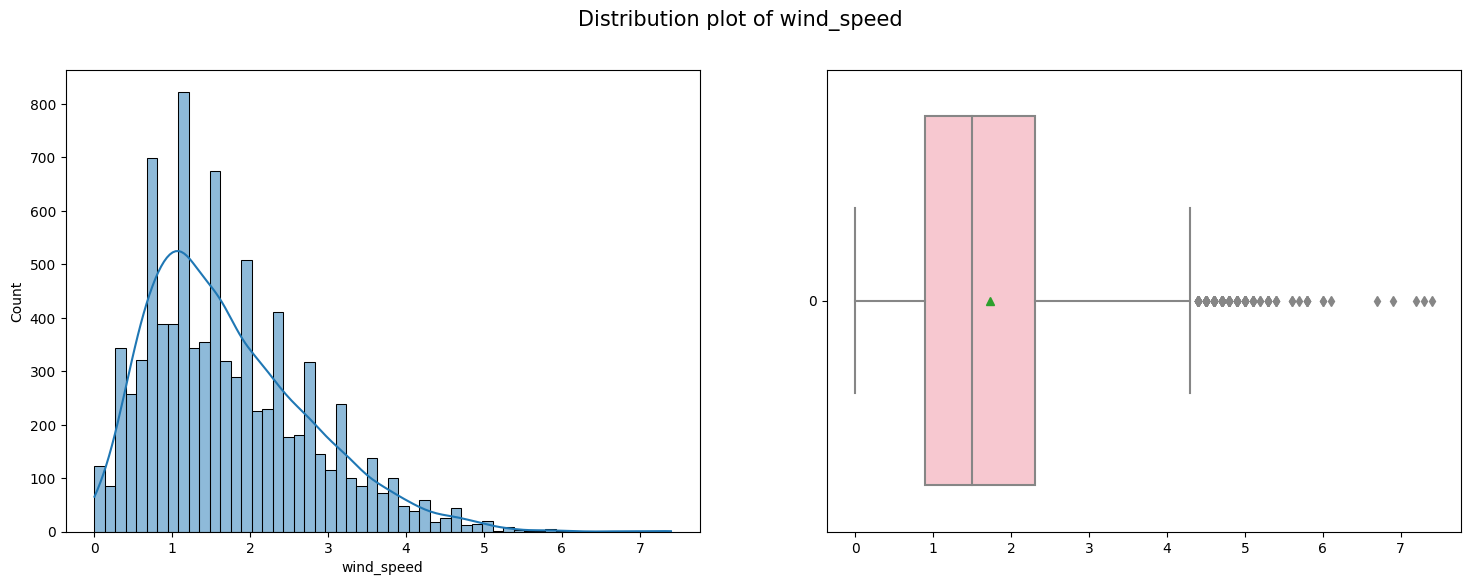

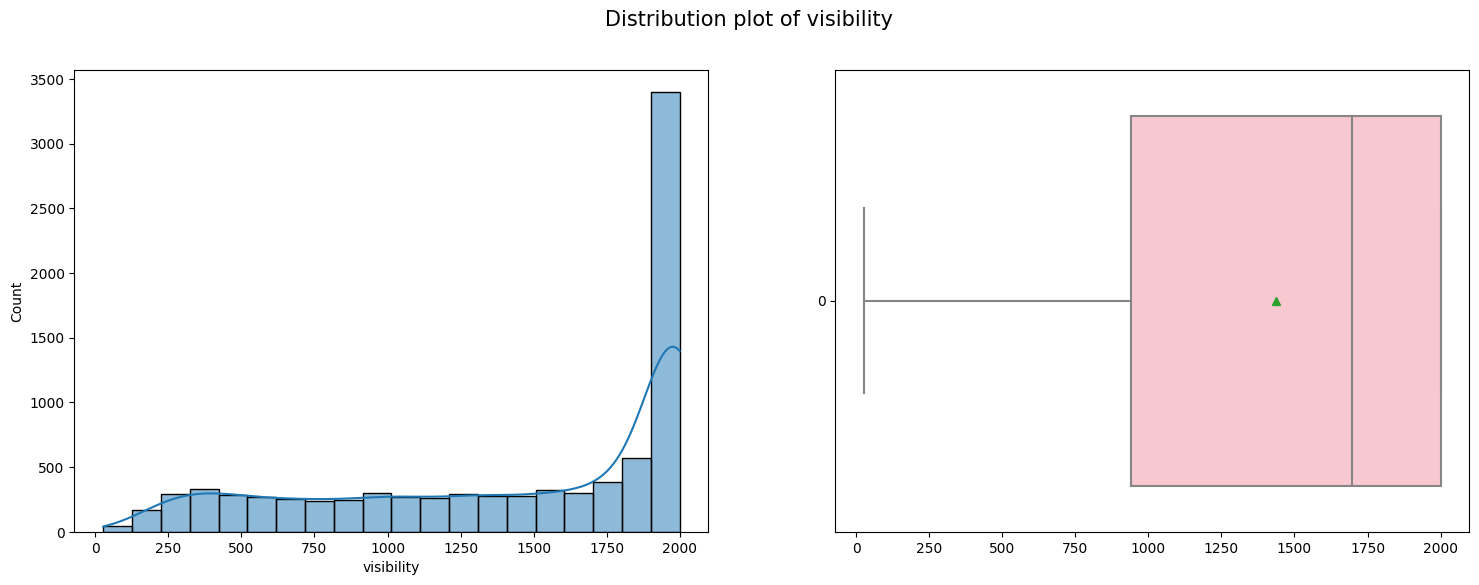

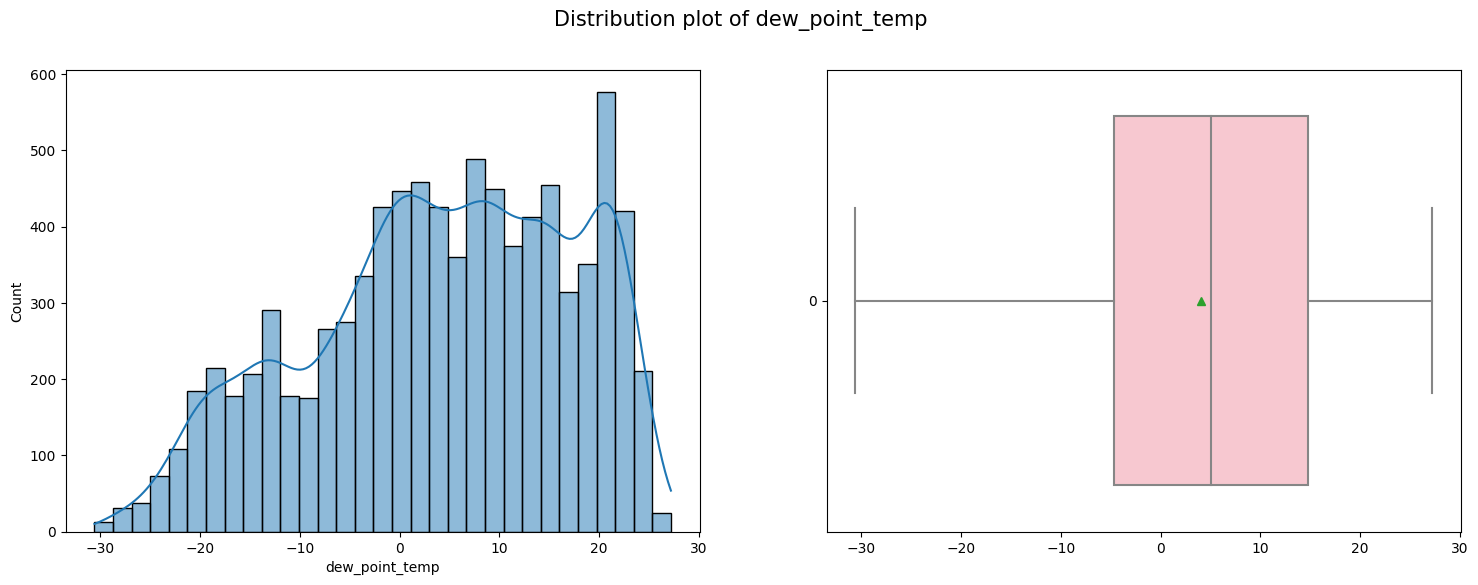

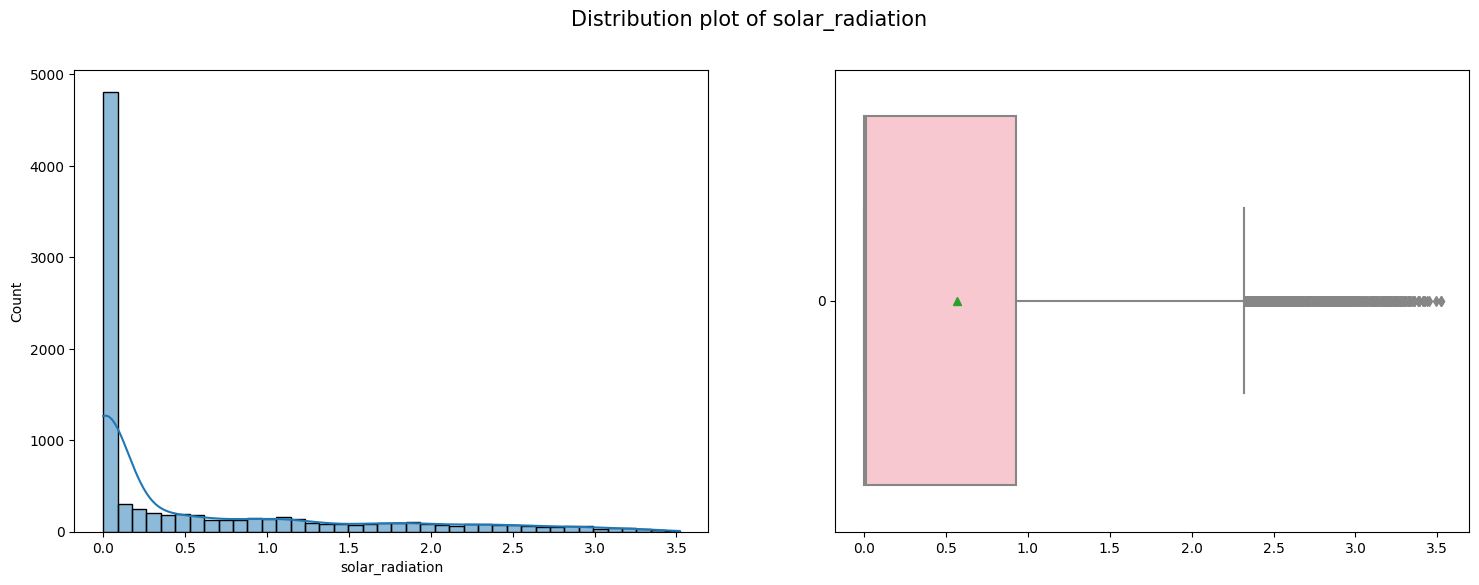

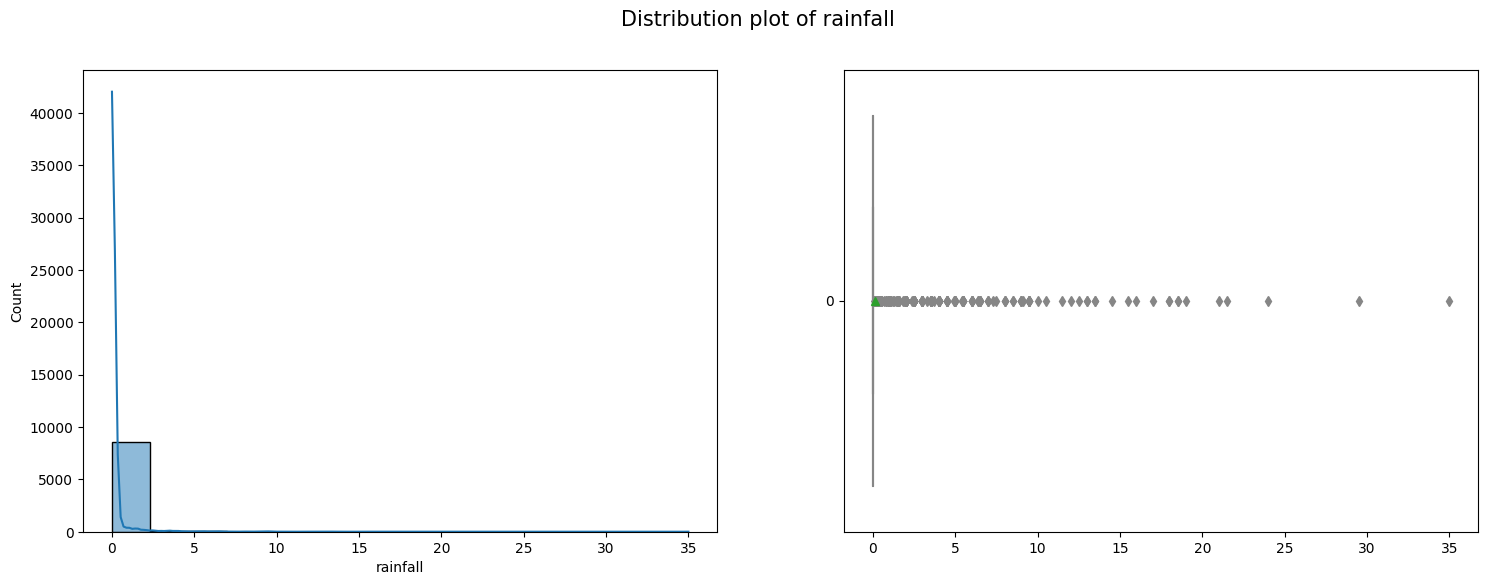

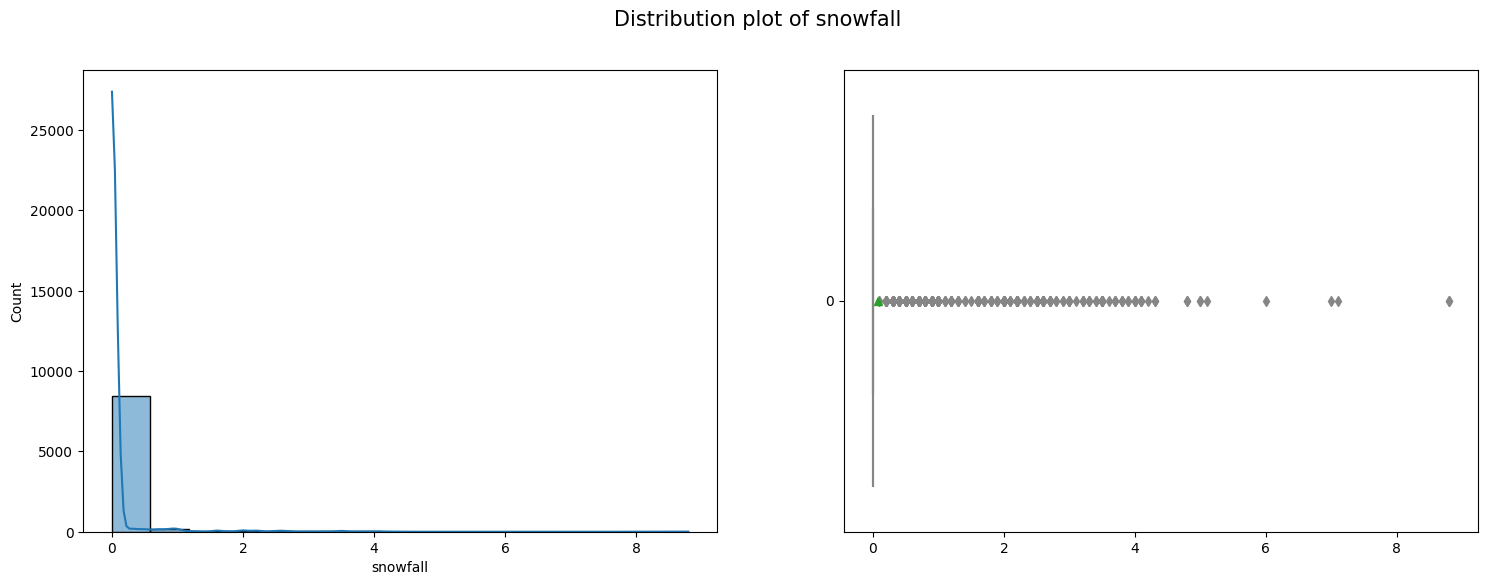

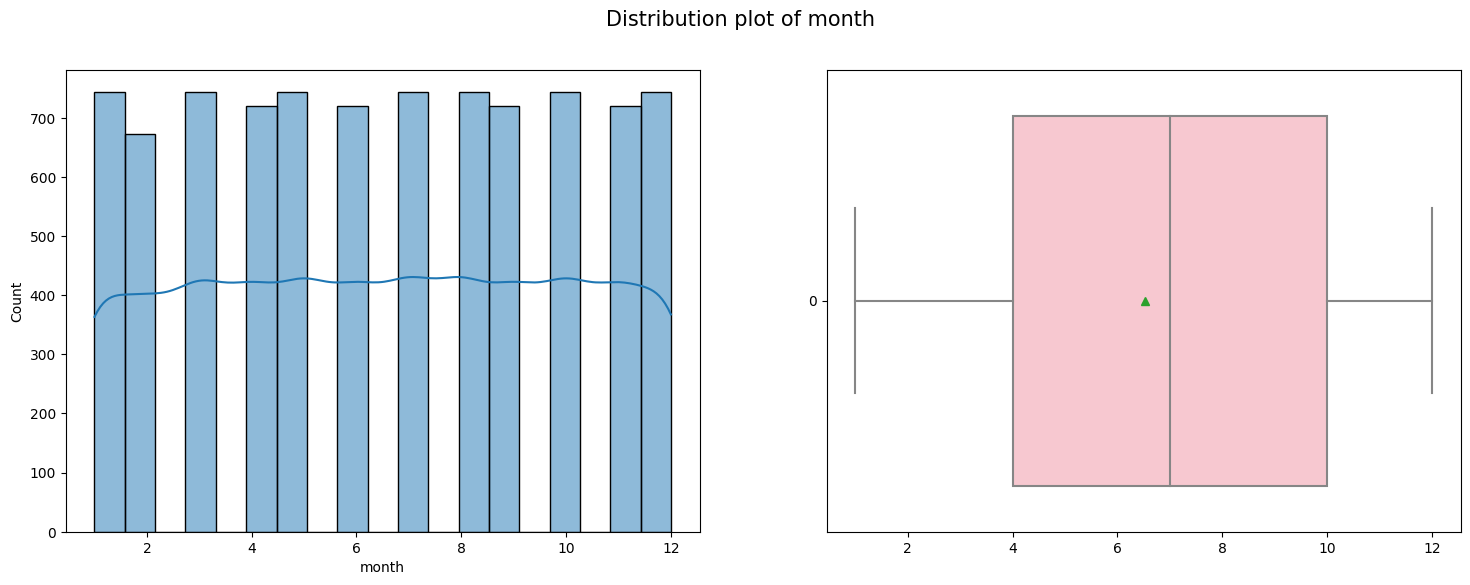

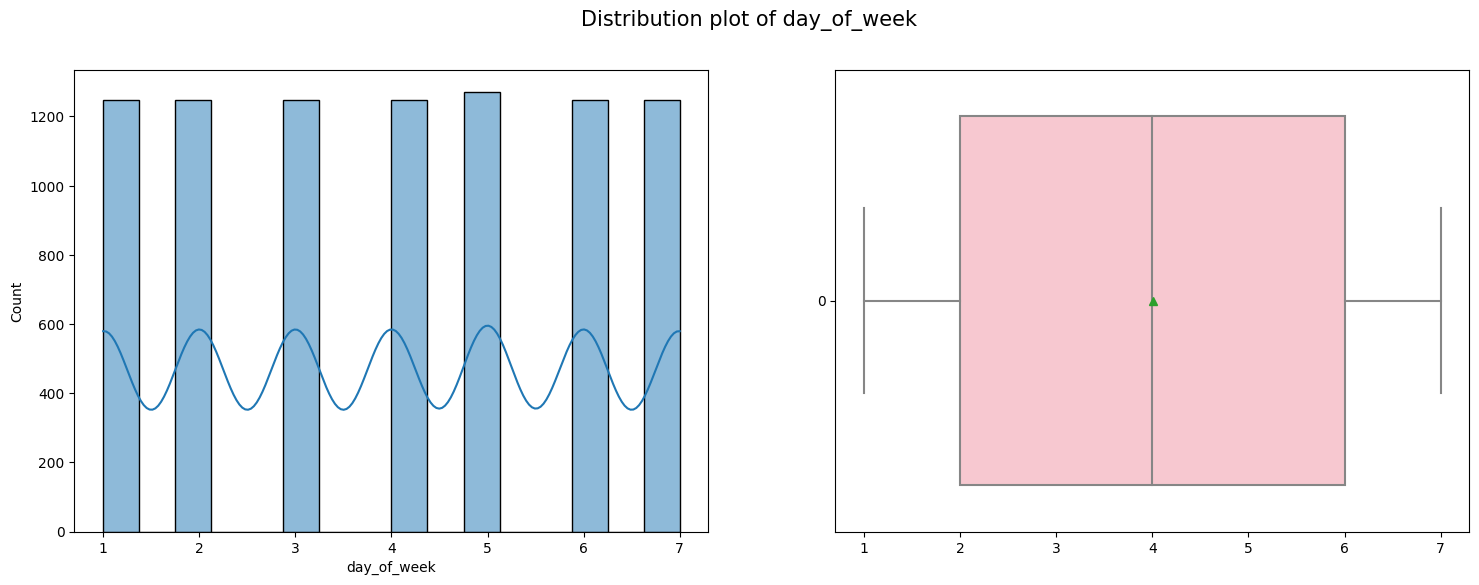

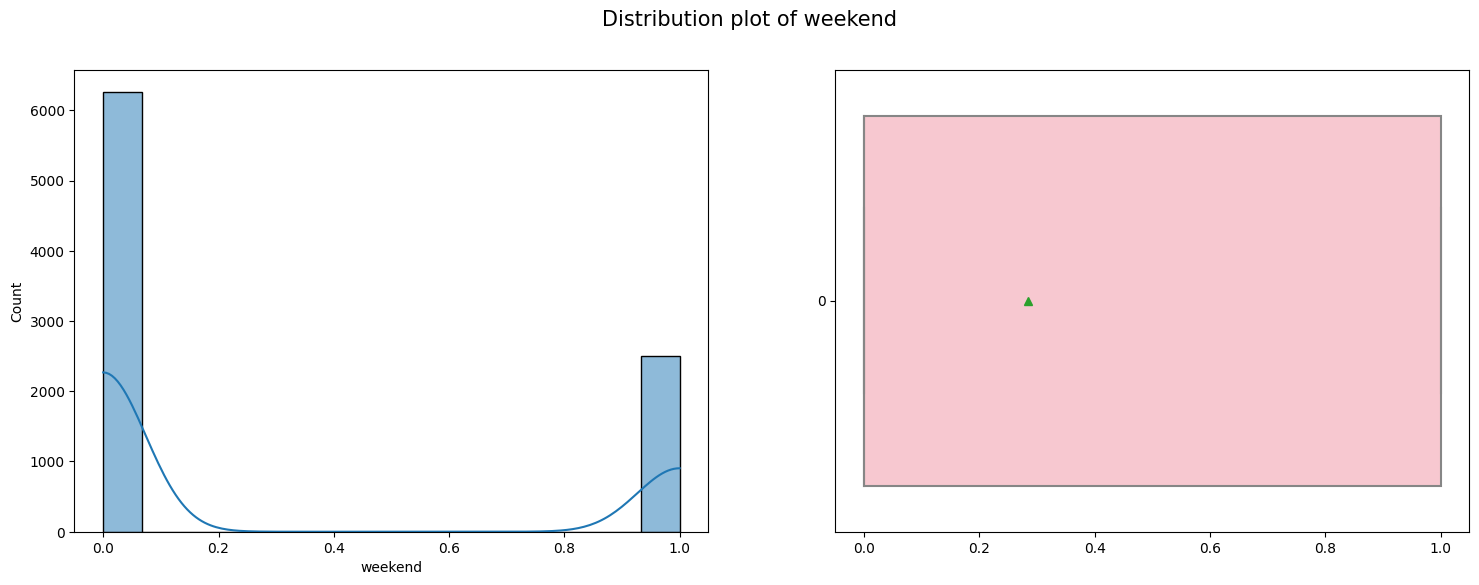

In [ ]:
# Chart - 2 Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in df.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(df[col], ax = axes[0],kde = True)
    sns.boxplot(df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()


##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, we used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, we used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

From above univariate analysis of all continuous feature variables. We got to know that only tempture and humidity columns are looks normally distributed others shows the different distributions.

Also we can see that there are outlier values in snowfall, rainfall, wind speed & solar radiation columns

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.


#### Chart - 3 Dependent variable with continuous variables (Bivariate)

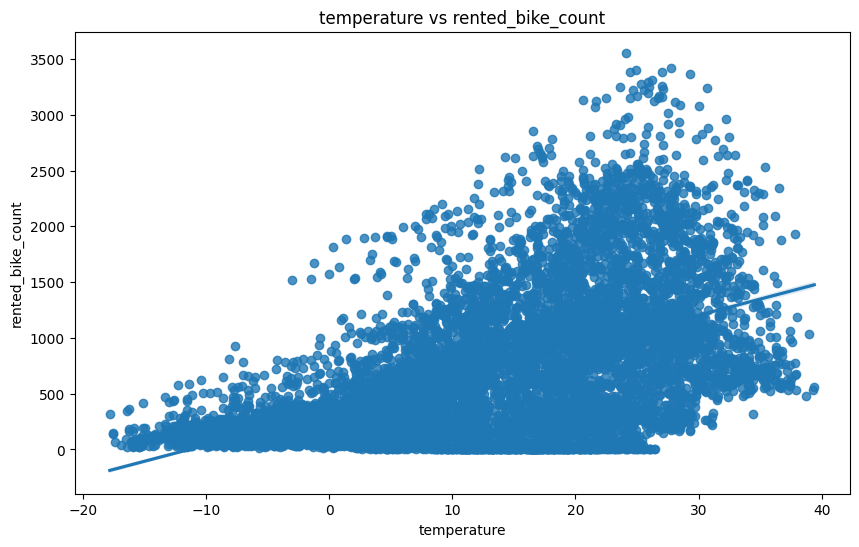

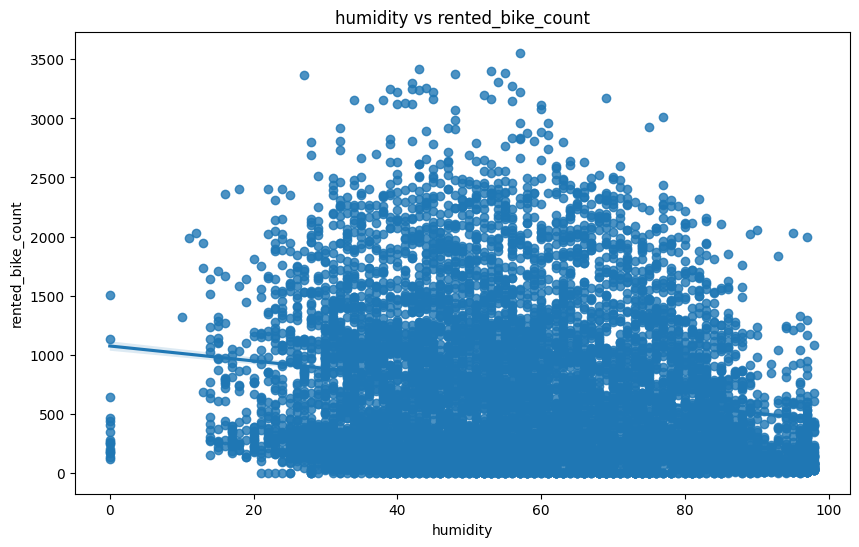

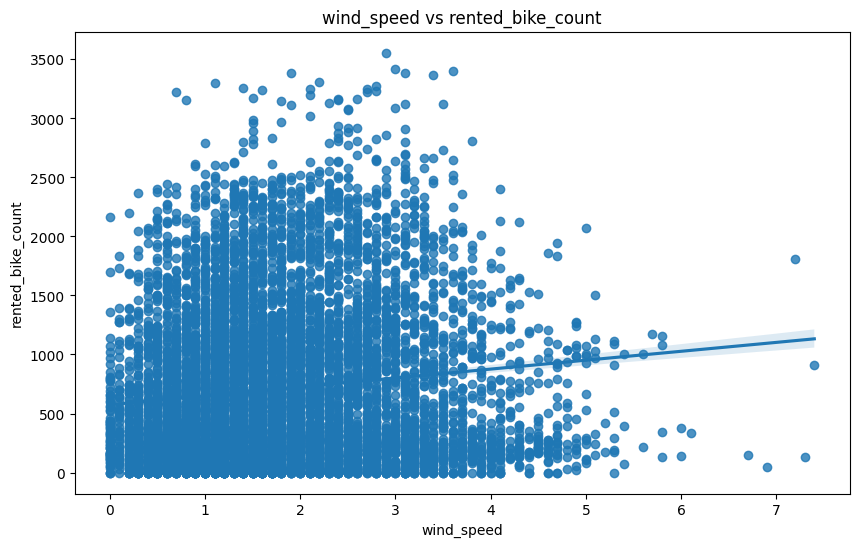

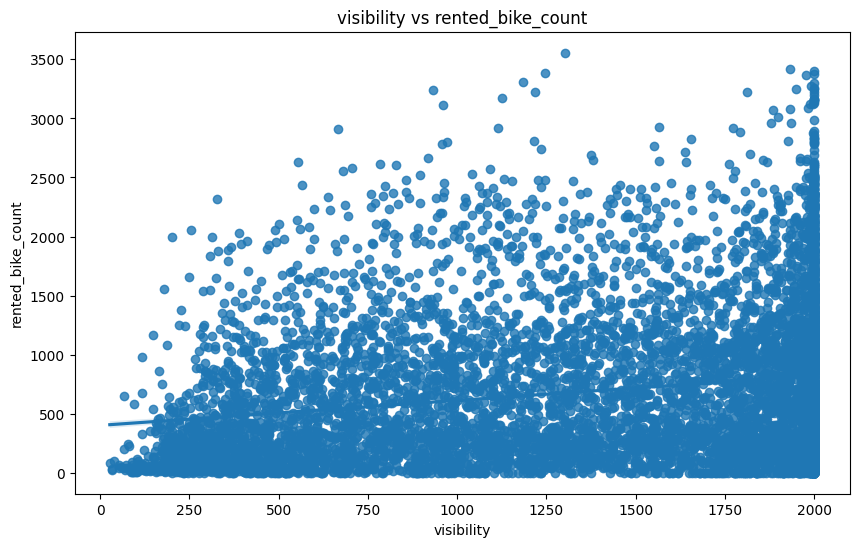

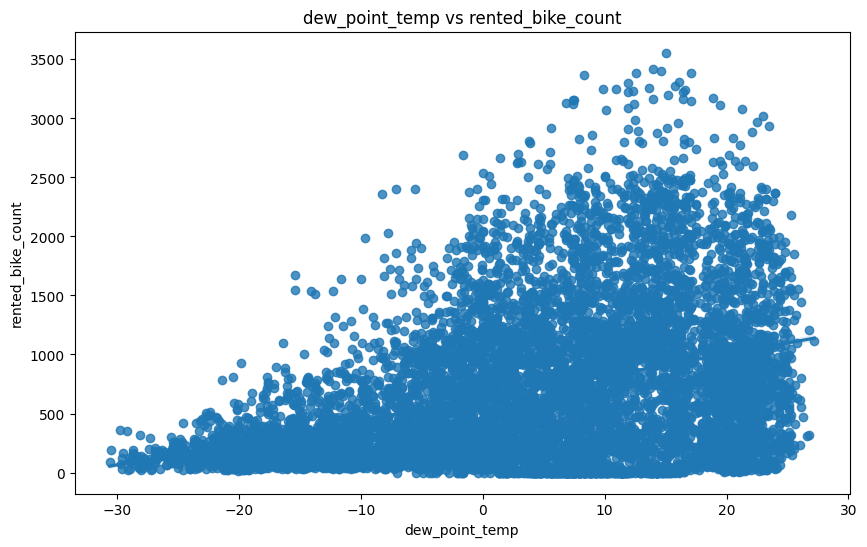

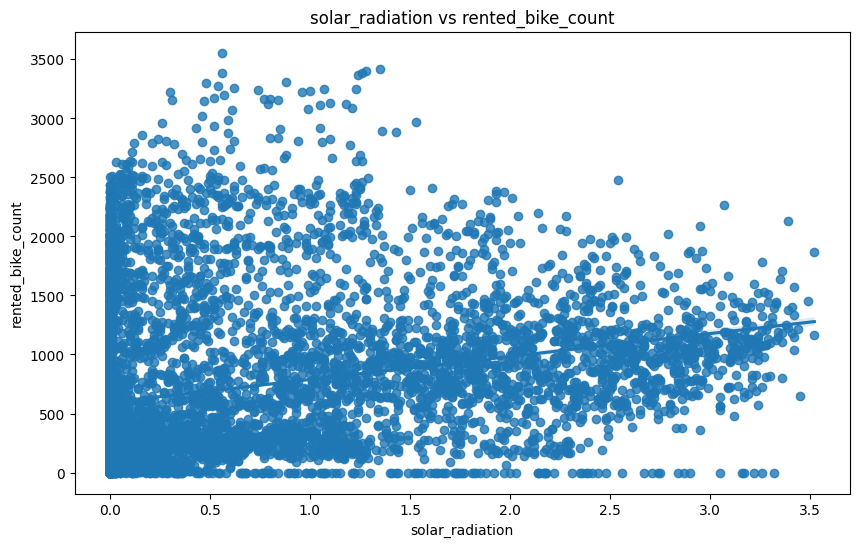

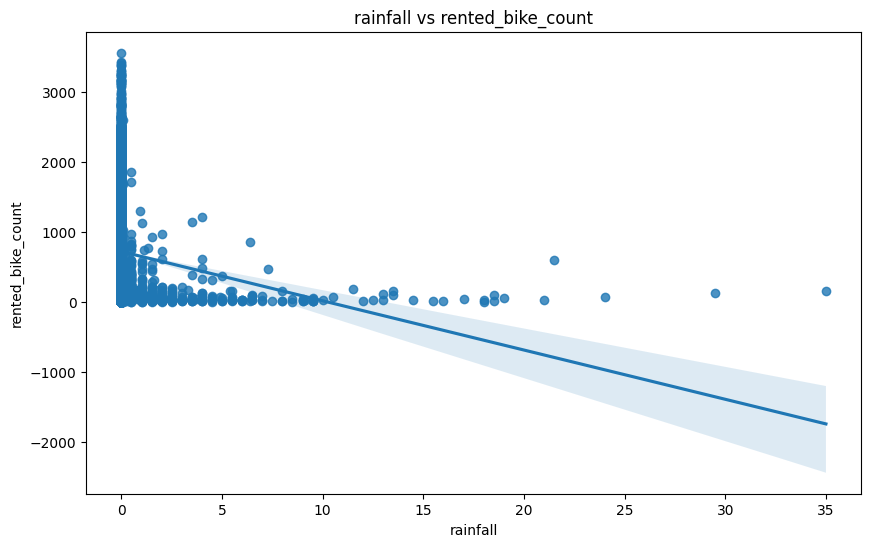

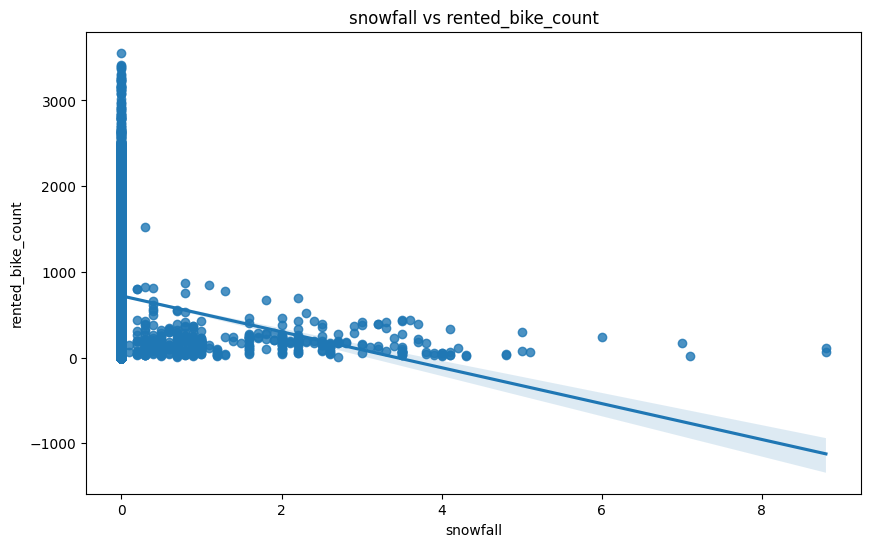

In [ ]:
# Chart - 3 visualization code
# Analyzing the relationship between the dependent variable and the continuous variables
for i in cont_var:
  plt.figure(figsize=(10,6))
  sns.regplot(x=i,y=dependent_variable[0],data=df)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

Regplot is used to create a scatter plot with linear regression line. The purpose of this function is to visualize the relationship between two continuous variables. It can help to identify patterns and trends in the data, and can also be used to test for linearity and independence of the variables.

To check the patterns between independent variable with our rented bike dependent variable we used this regplot.

##### 2. What is/are the insight(s) found from the chart?

From above regression plot we can see that there is some linearity between temperature, solar radiation & dew point temperature with dependent variable rented bike

Other variables are not showing any patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helped a little bit from this we got to know that there are few variables which are showing some patterns with dependent variable this variable are maybe important feature while predicting for rented bike count so business needs focus on these variables.

#### Chart - 4  Categorical variables with dependent variable (bivariate)

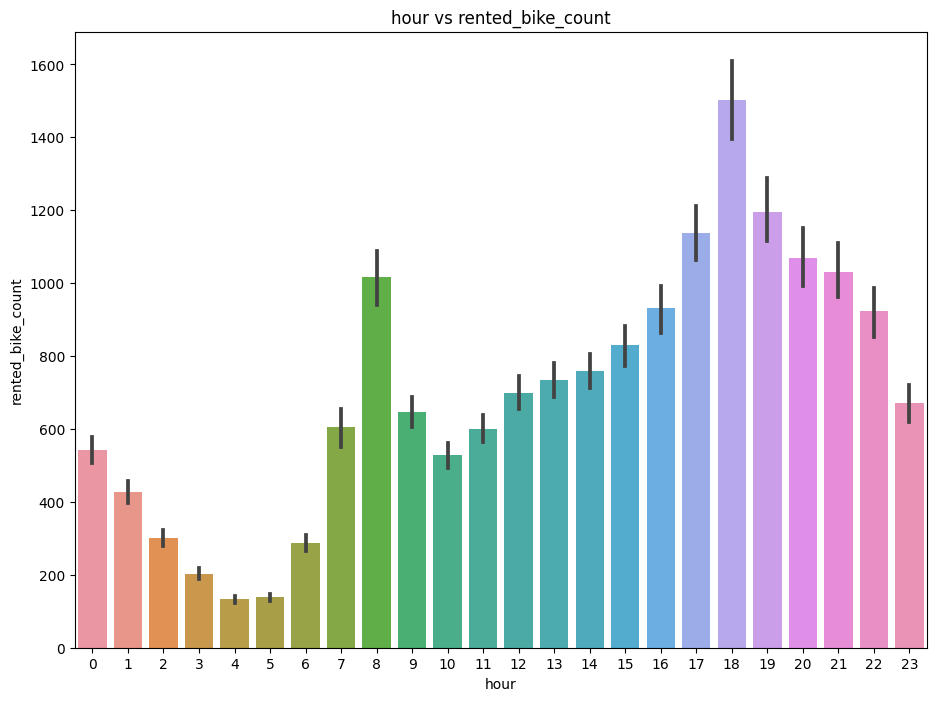

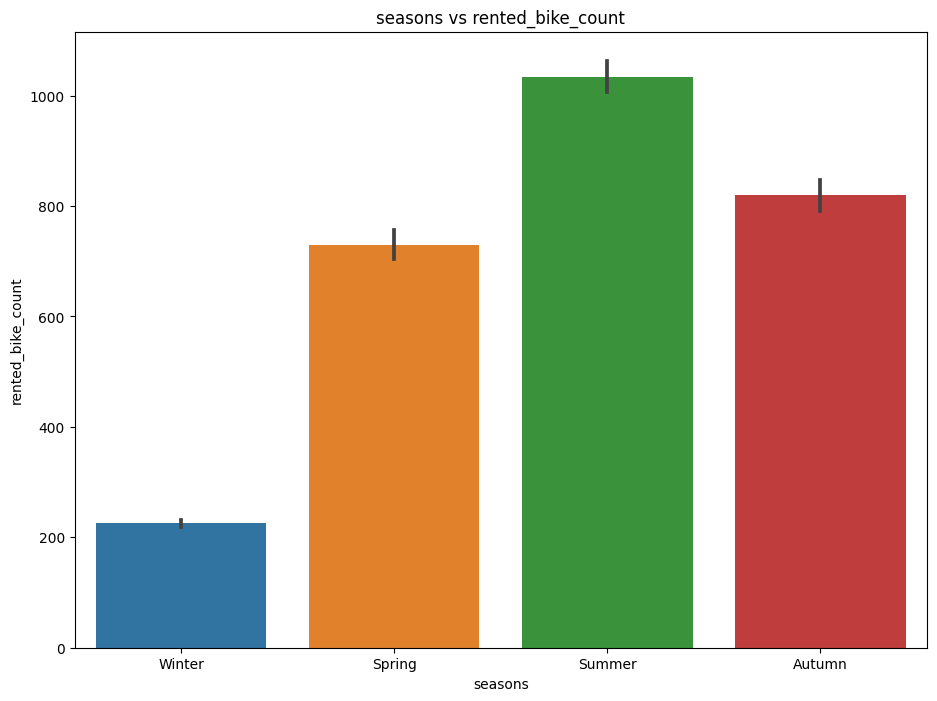

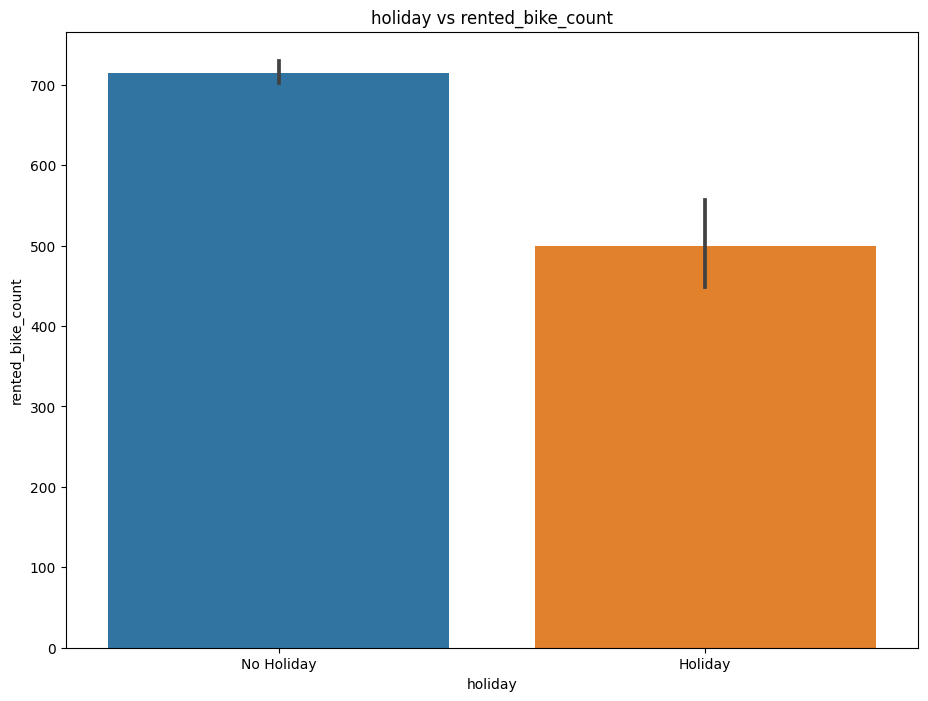

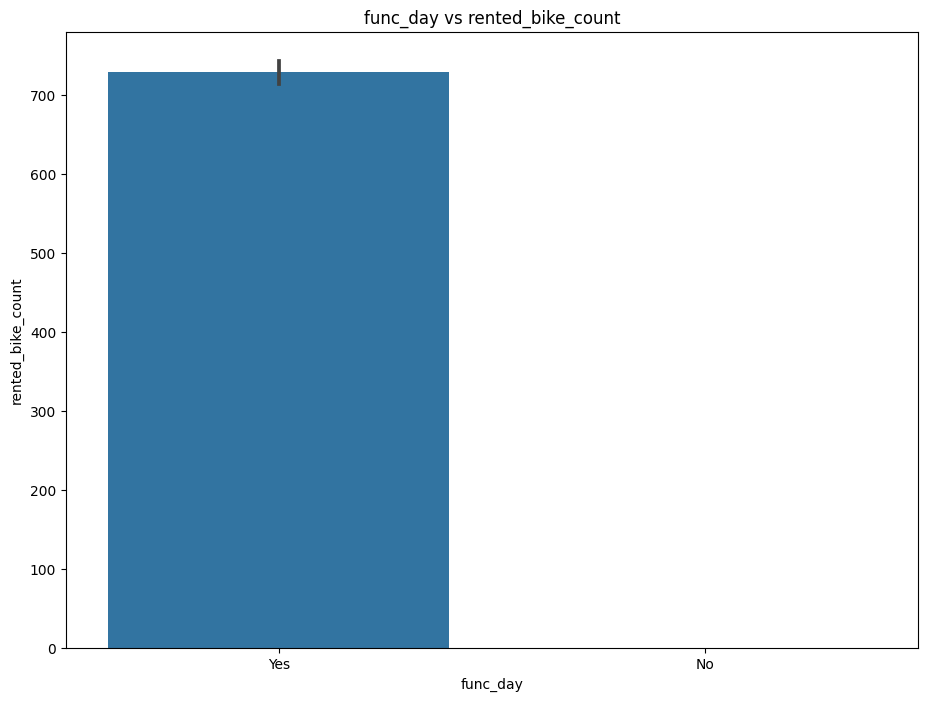

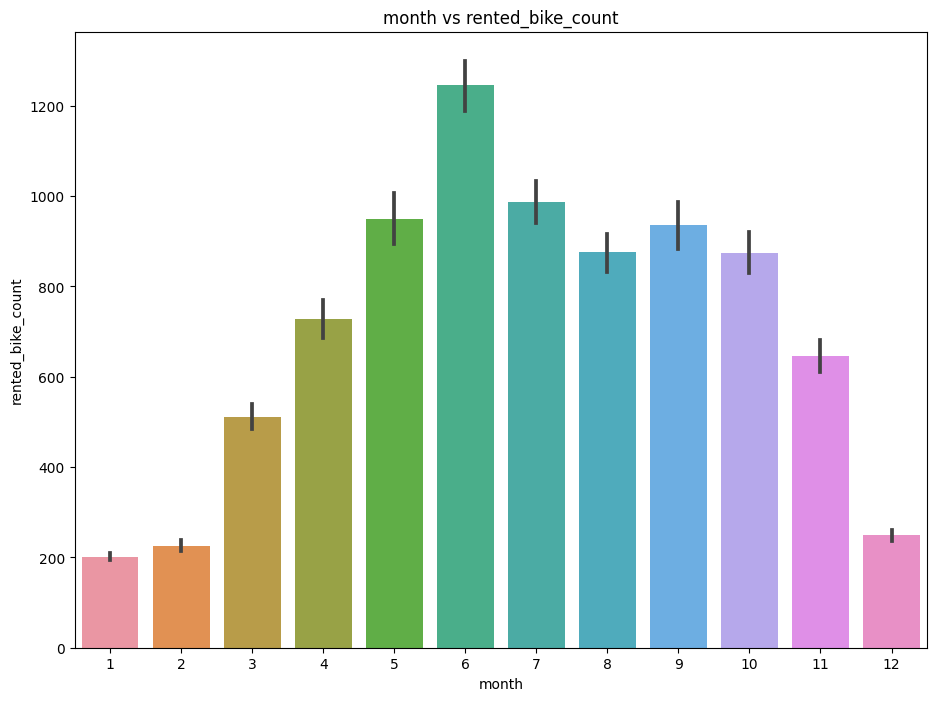

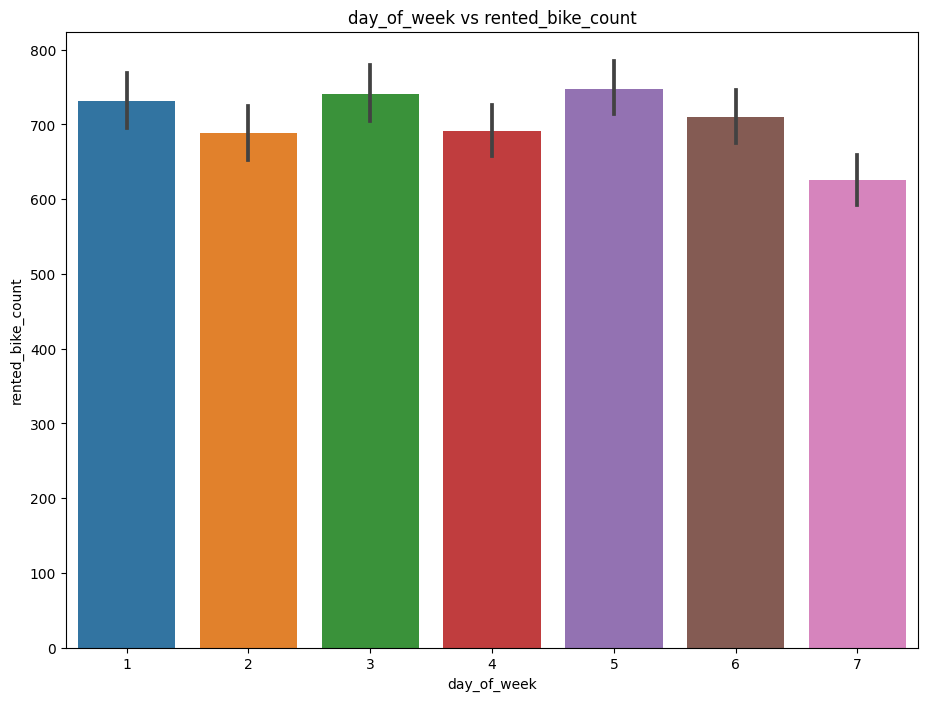

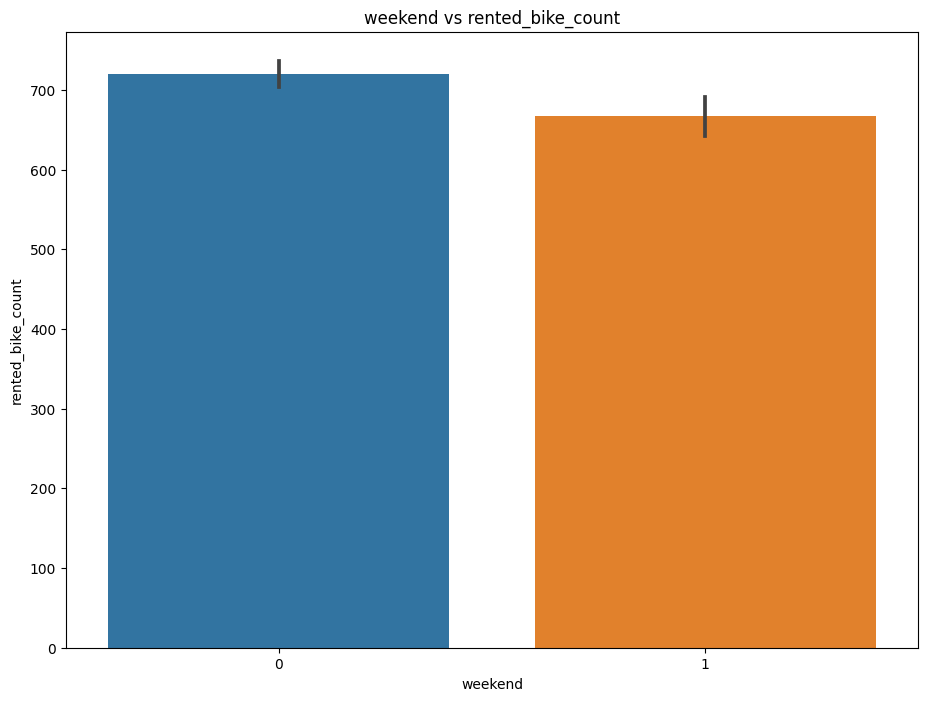

In [ ]:
# Chart - 4 visualization code
# Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
  plt.figure(figsize=(11,8))
  sns.barplot(x=i,y=dependent_variable[0],data=df)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

To show the distribution of the rented bike count with other categorical variables we used bar charts.

##### 2. What is/are the insight(s) found from the chart?

From above bar charts we got insights:

1. In hour vs rented bike chart there is high demand in the morning 8'o clock and evening 18'o clock
2. From season vs rented bike chart there is more demand in summer and less demand in winter.
3. There is high demand on working days.
4. From month chart we know that there is high demand in month of june.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are going to provide some positive business impact, beacause analysing the demand on the basis of categorical varible we got know that when demand for bike is more so we can focus more on that portion.

#### Chart - 5 Rented Bike vs Hour

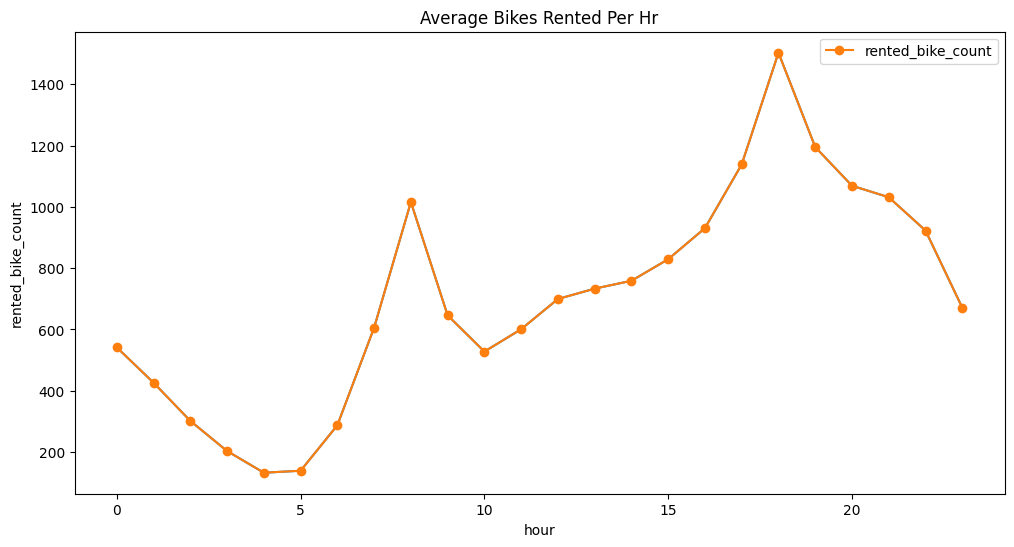

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('hour')['rented_bike_count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_rent_hrs, marker='o')
plt.title('Average bike rented per hour')
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
# a.set_xticks(range(len(avg_rent_hrs)))
# a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how rented bike demand is distributed over 24 hours time we used line plot.

##### 2. What is/are the insight(s) found from the chart?

From above line plot we can clearly see that there is high demand in the morning and in the evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we know that there is high demand in morning and evening so business needs to focus more on that time slot. as well as try to meet the demand on that time slot.

#### Chart - 6 Bike demand throughout the day (Multivariate)

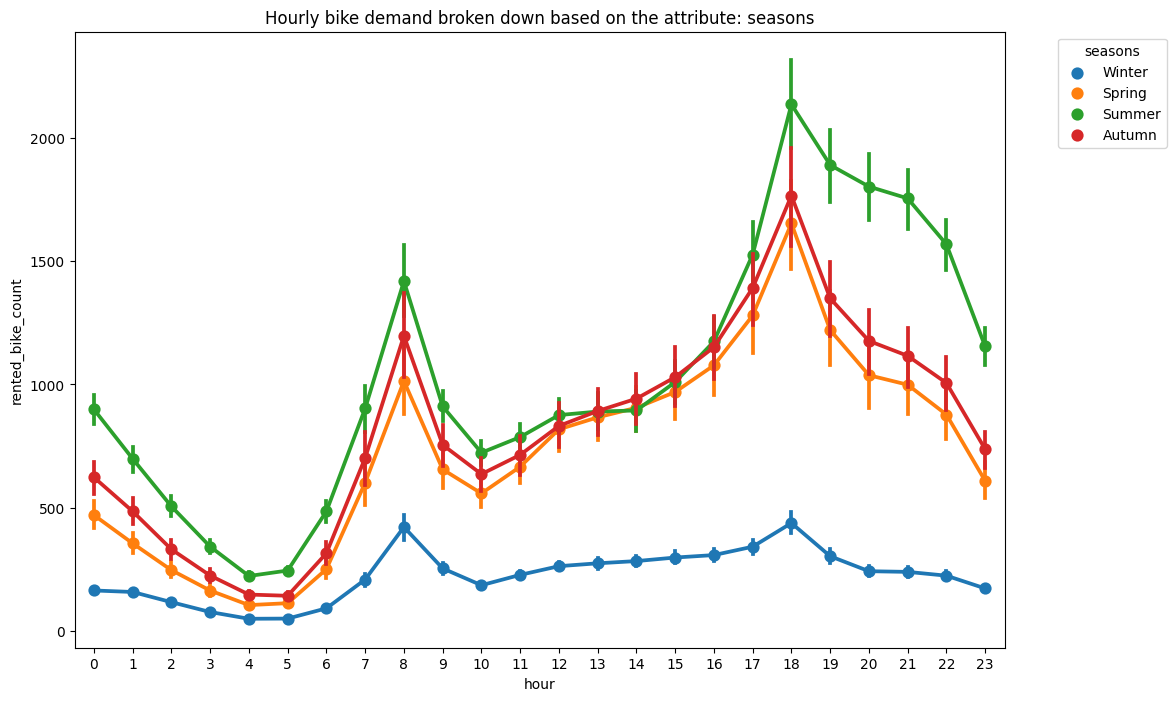

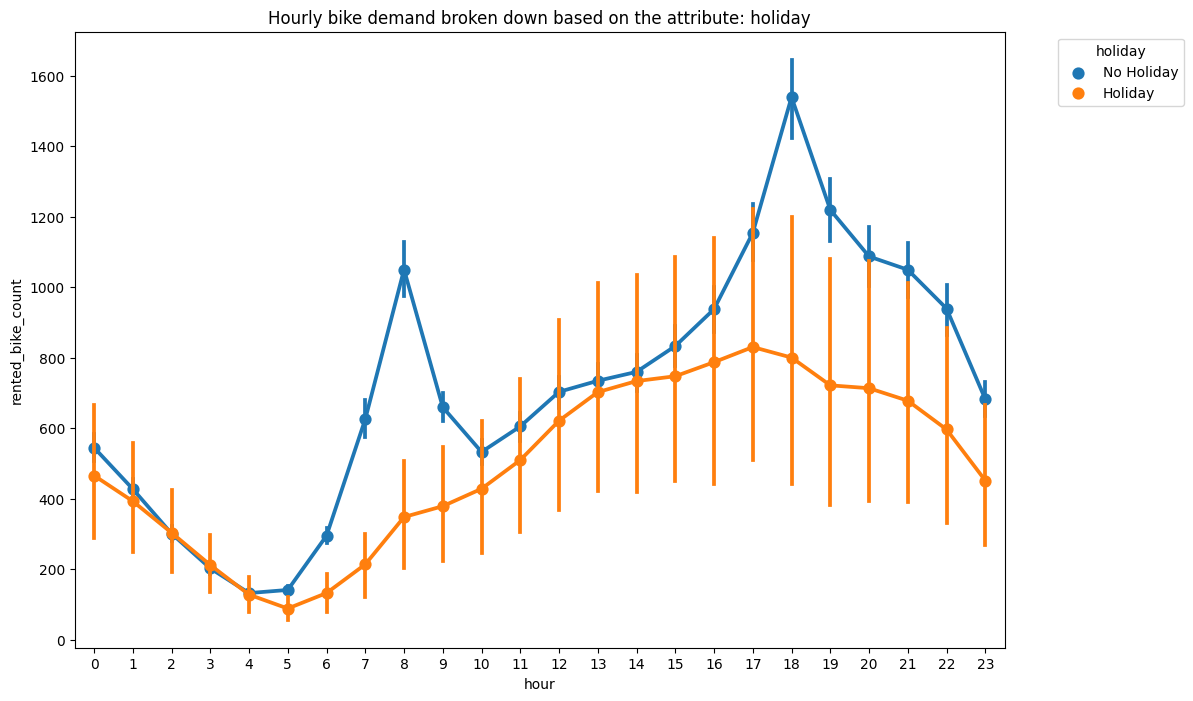

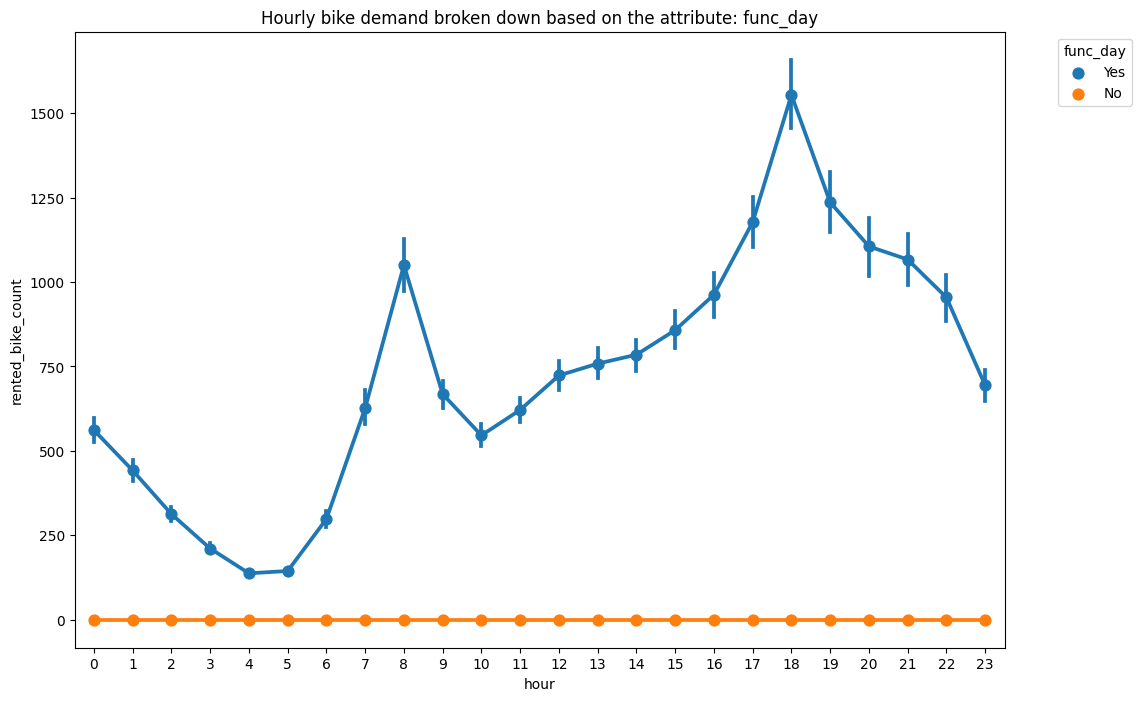

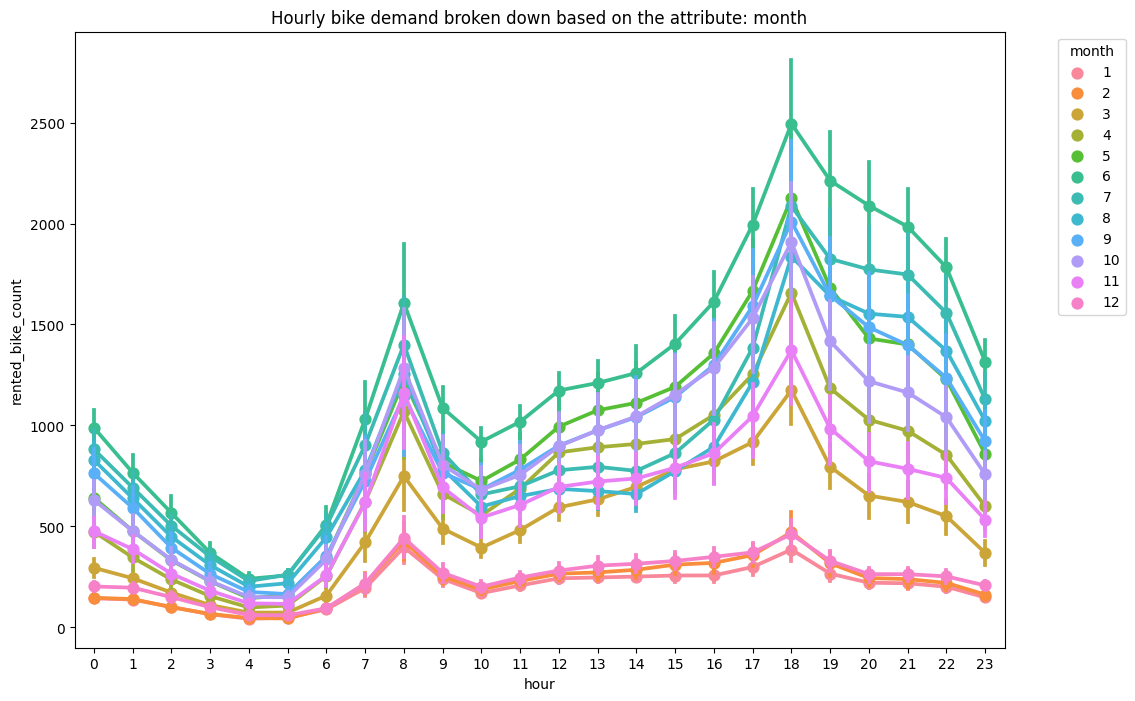

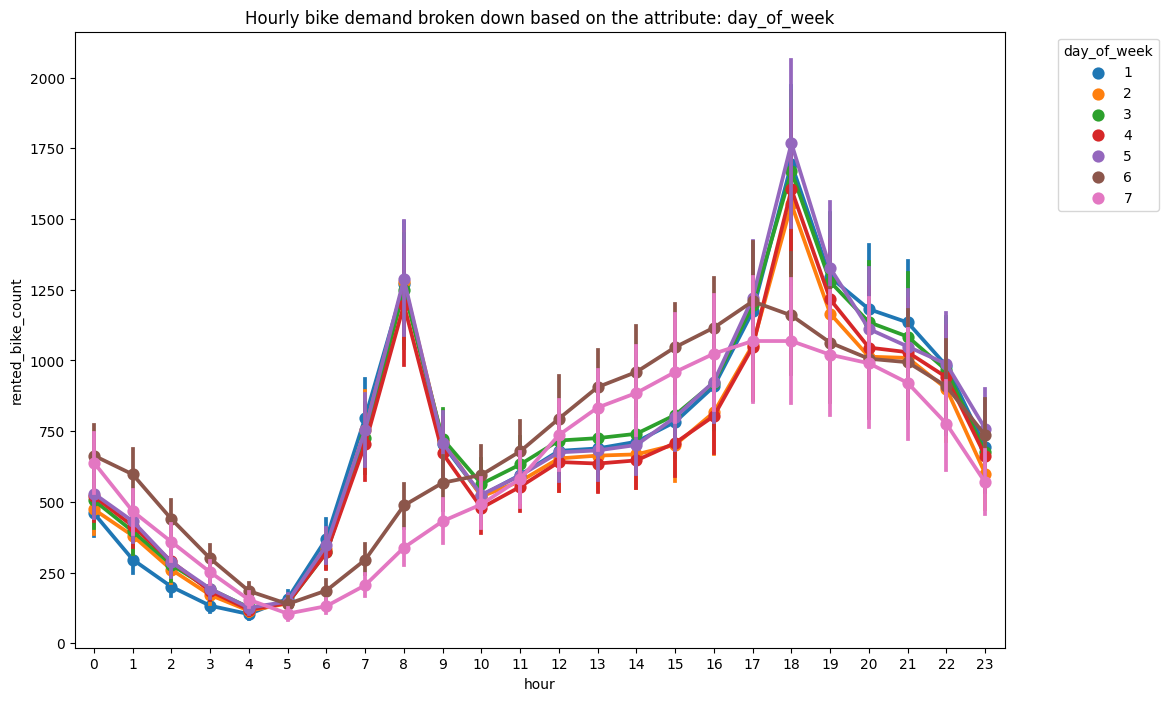

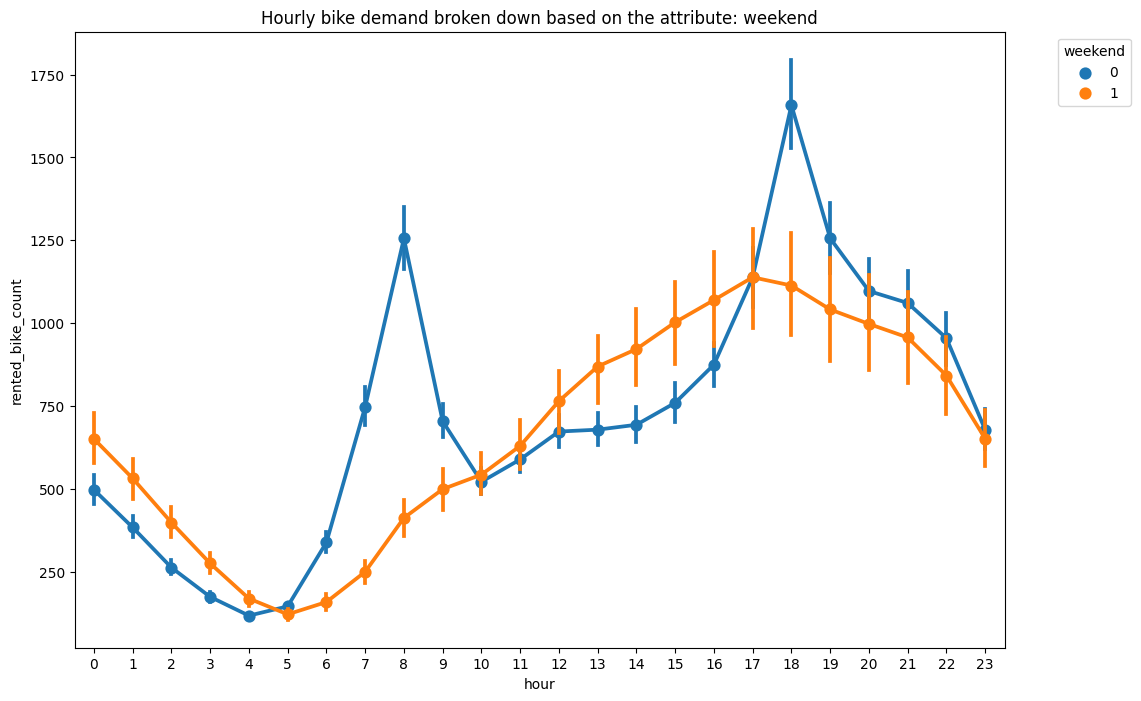

In [ ]:
# Chart - 6 visualization code
for i in cat_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(12,8))
    sns.pointplot(data=df, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To show the demand of rented bike throughout the day on the basis of other categorical variable we used line plot drawing multiple lines on charts.

##### 2. What is/are the insight(s) found from the chart?

From above line plots we see that :

1. In winter season there is no significant demand even in the morning or in the evening.
2. On the functional day (i.e No Holiday) there is spike in morning and in evening, but that is not there on Holidays.
3. Around 3 months in winter season (i.e December, January & February) there is low demand.
4. On weekend almost throught the day there is demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this analysis we figure out some key factors such as high demand in morning and evening slot in all the seasons.

#### Chart - 7 Categorical plot for seasons

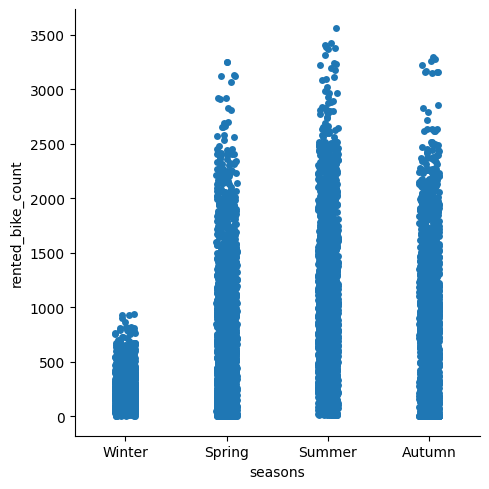

In [ ]:
#plot for rented bike count seasonly
sns.catplot(x='seasons',y='rented_bike_count',data=df)

##### 1. Why did you pick the specific chart?

Catplot is used to create a categorical plot. Categorical plots are plots that are used to visualize the distribution of a categorical variable. They can be used to show how a variable is related to a categorical variable and can also be used to compare the distribution of multiple categorical variables.

To see the distribution of the rented bike on basis of season column we used catplot.

##### 2. What is/are the insight(s) found from the chart?

From above catplot we got know that:

1. There is low demand in winter
2. Also in all seasons upto the 2500 bike counts distribution is seen dense.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this catplot we know that there is high bike count upto the 2500 so, above that there maybe outliers present. business needs to evaluate that.

#### Chart - 8 bikes rental by season

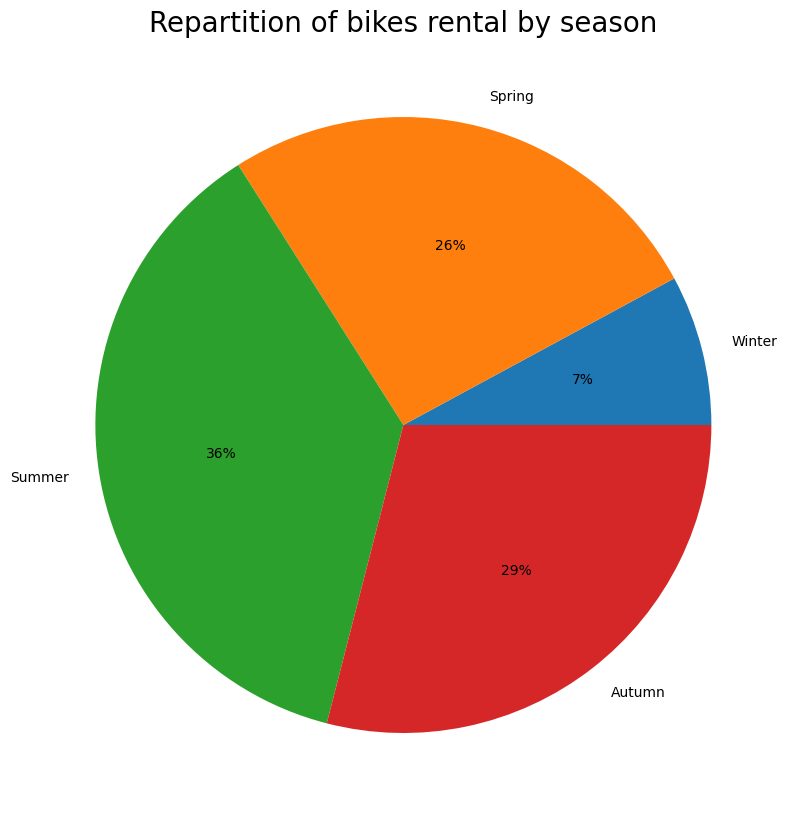

In [ ]:
# Chart - 8 visualization code
Winter=df[df["seasons"]=='Winter'].sum()
Spring=df[df["seasons"]=='Spring'].sum()
Summer=df[df["seasons"]=='Summer'].sum()
Autumn=df[df["seasons"]=='Autumn'].sum()

BikeSeasons={"Winter":Winter["rented_bike_count"],"Spring":Spring["rented_bike_count"],"Summer":Summer["rented_bike_count"],"Autumn":Autumn["rented_bike_count"]}
plt.gcf().set_size_inches(10,10)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%');
plt.title("Repartition of bikes rental by season", fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

So, we used pie chart to see percentage distribution of rented bike on the basis of sseasons

##### 2. What is/are the insight(s) found from the chart?

From above pie chart:

1. In year data season summer contributes around 36% then autumn around 29%
2. Lowest demand in winter, it contributes around only 7%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insights only tell about percentage contribution of year data of season varible, which clearly gave indication about demand.

#### Chart - 14 - Correlation Heatmap

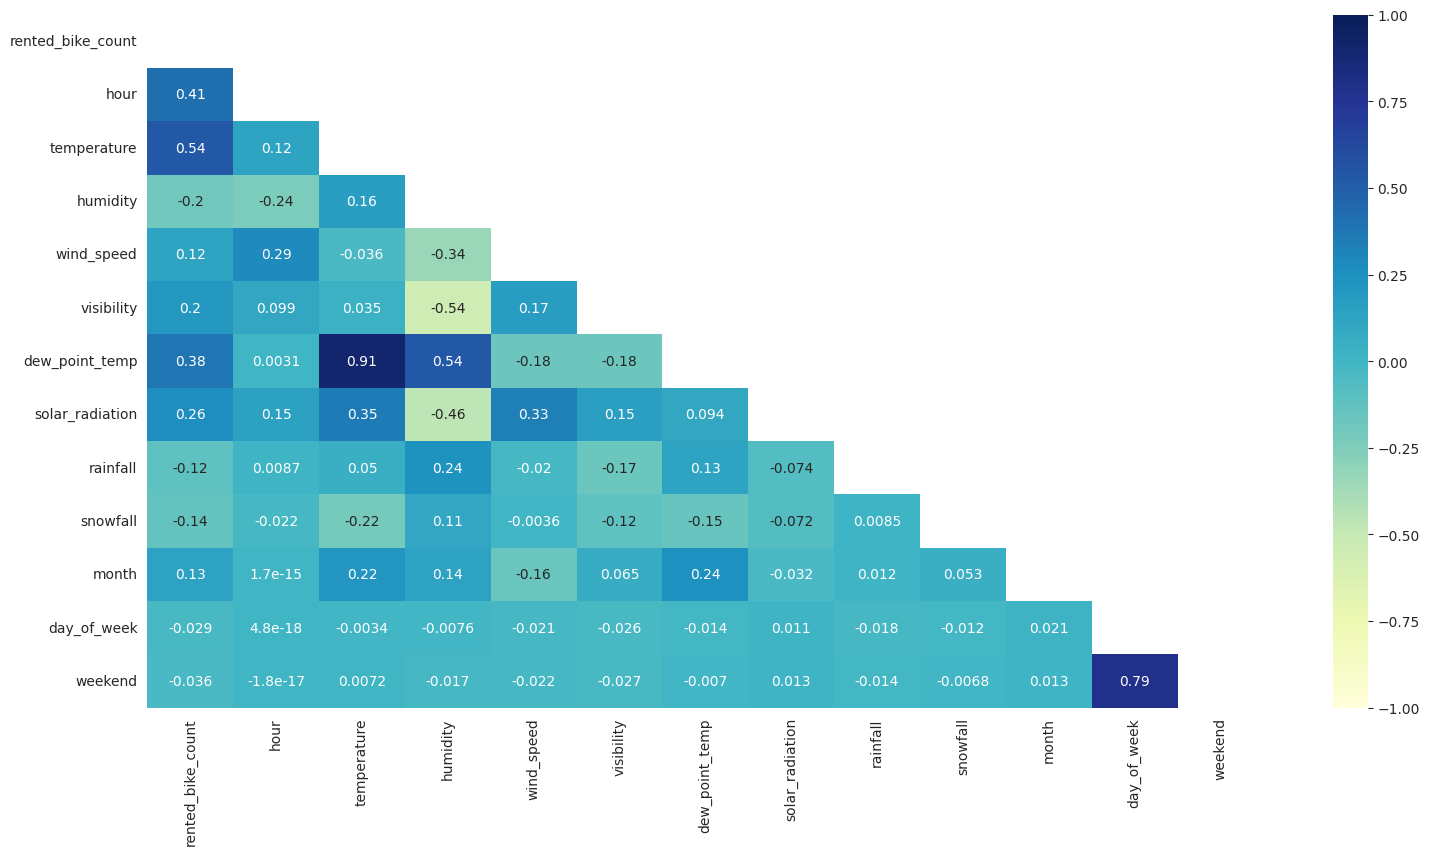

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From above correlation map we can clearly see that:

1. There is high multicolinearity between independent variable (i.e temperature & dew point temp, humidity & dew point temp, weekend & day of week).
2. There is correlation of temperature, hour, dew point temp & solar radiation with dependent variable rented bike.


#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From above pair plot we got to know that, there is not clear linear relationship between variables. other than dew point temp, temperature & solar radiation there is not any relationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
#creating parameter class
import math
from scipy import stats
from scipy.stats import norm
class z_score:
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def var(self,hyp,sample,size):
    return (size-1)*sample/hyp
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
z_cum_dis_fun = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=z_cum_dis_fun(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value

# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
z_score = z_score()

### Hypothetical Statement - 1

There is no bike rental demand when the average temp is atmost 15.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: H0: mean = 15 Alternate Hypothesis: H1: mean >15 Test-type: Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo1=df[(df['rented_bike_count']==0 )]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 10
sample_mean = int(hypo1["temperature"].mean())
size = len(hypo1)
std=(variance(hypo1["temperature"]))**0.5

In [ ]:
# Getting Z value
z = z_score.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=hypo1,col="temperature")
# Getting Conclusion
print(z)
print(conclusion(p))

21.97106374526377
Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found that we failed to reject the null hypothesis and there is no demand of bikes when average temperature is 16 maximum.

##### Why did you choose the specific statistical test?

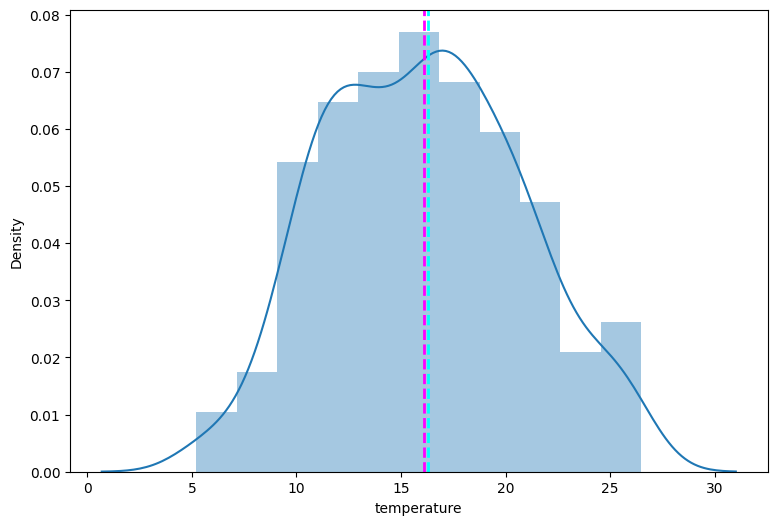

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo1["temperature"])
sns.distplot(hypo1["temperature"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()


As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2  There is no bike demand when the average Humidity is atleast 50.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: H0: mean = 50 Alternate Hypothesis: H1: mean <50 Test-type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
hypo2=df[(df['rented_bike_count']==0 )]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 50
sample_mean = int(hypo1["humidity"].mean())
size = len(hypo1)
std=(variance(hypo1["humidity"]))**0.5

In [ ]:
# Getting Z value
z = z_score.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo2,col="Humidity")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 1.0.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and we failed to reject the Null hypothesis and can conclude that there is no demand for bikes when Humidity is not atleast 50.

##### Why did you choose the specific statistical test?

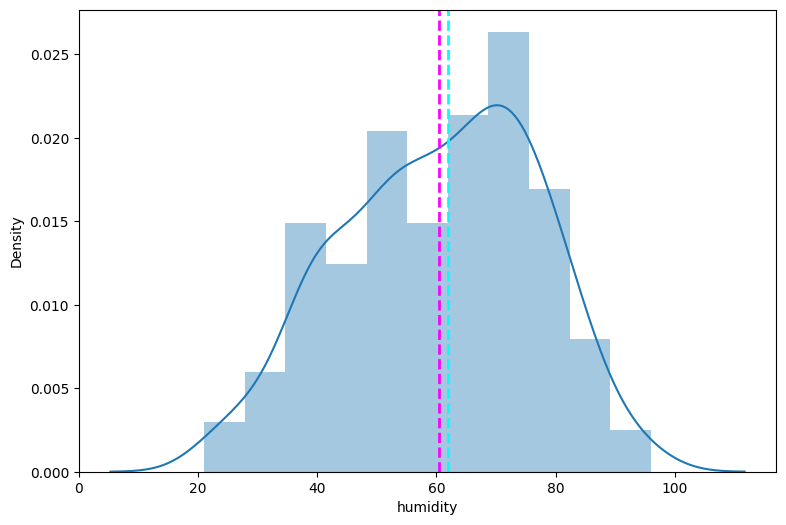

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo2["humidity"])
sns.distplot(hypo2["humidity"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()


As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 3 The average Solar Radiation is 0.6 when there is no demand for bike



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: mean=0.6 H1: mean!=0.6 Test:Two-Tailed test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import math
hypo3=df[(df["rented_bike_count"]==0)]
# Getting the required parameter values for hypothesis testing
hypothesis_number =0.6
sample_mean = round((hypo3["solar_radiation"].mean()),2)
size = len(hypo3)
std=(variance(hypo3["solar_radiation"]))**0.5
sample_mean

0.6

In [ ]:
# Getting Z value
z = z_score.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='d',t="false",hypothesis_number=hypothesis_number,df=hypo3,col="solar_radiation")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 1.0.


##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that we failed to reject the Null hypothesis and can conclude that when Solar Radiation is 0.6 there is no bike demand.

##### Why did you choose the specific statistical test?

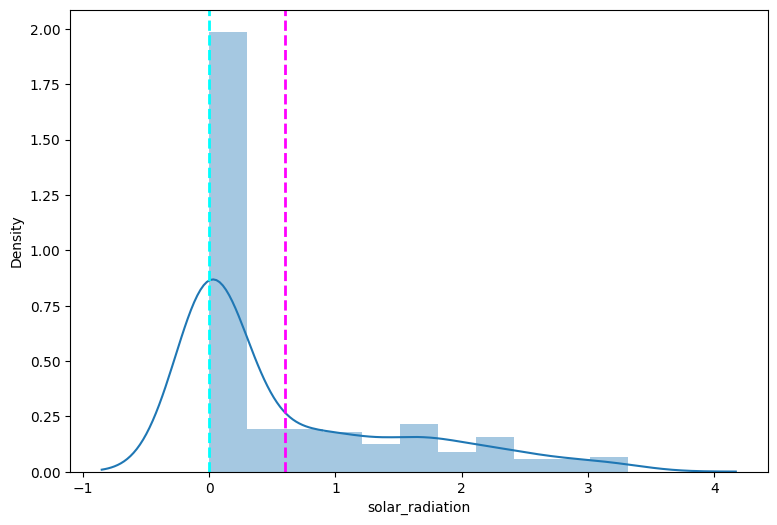

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo3["solar_radiation"])
sns.distplot(hypo3["solar_radiation"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

From the above chart we can say that the distribution is postively skewed. For a skewed data Z-Test can't be performed. So, for a skewed data we can use T-test for better result. Thus, I used t - test.

## ***6. Feature Engineering & Data Pre-processing***

###  Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation


#### What all missing value imputation techniques have you used and why did you use those techniques?

### 1. Handling Outliers

In [ ]:
'''# Handling Outliers & Outlier treatments
# Removing outliers by Using IQR method:
q1, q3, median = df.rented_bike_count.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['rented_bike_count'] = np.where(df['rented_bike_count'] > upper_limit, median,np.where(df['rented_bike_count'] < lower_limit,median,df['rented_bike_count']))

# Removing outliers by Capping:
for col in ['wind_speed','solar_radiation','rainfall','snowfall']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])'''

"# Handling Outliers & Outlier treatments\n# Removing outliers by Using IQR method:\nq1, q3, median = df.rented_bike_count.quantile([0.25,0.75,0.5])\nlower_limit = q1 - 1.5*(q3-q1)\nupper_limit = q3 + 1.5*(q3-q1)\ndf['rented_bike_count'] = np.where(df['rented_bike_count'] > upper_limit, median,np.where(df['rented_bike_count'] < lower_limit,median,df['rented_bike_count']))\n\n# Removing outliers by Capping:\nfor col in ['wind_speed','solar_radiation','rainfall','snowfall']:\n  upper_limit = df[col].quantile(0.99)\n  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])"

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here we use IQR method and Capping method, Based on IQR method we set Upper limit and Lower limit of rented bike count and convert those outliers into median values.

Also we capp outliers upto 99th percentile and above that we convert those outliers into upper limit value.

##Note :-
We have tried to remove the outliers but it has seen that there is drop in performance after removing the outliers around 10% drop in model performance
So, we have decided that we will perform the model without removing the outliers.

### 2. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Converting snowfall and rainfall to categorical attributes
df['snowfall'] = df['snowfall'].apply(lambda x: 1 if x>0 else 0)
df['rainfall'] = df['rainfall'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
# encoding the visibility column
df['visibility'] = df['visibility'].apply(lambda x: 0 if 0<=x<=399 else (1 if 400<=x<=999 else 2))

In [ ]:
# encoding
df['func_day'] = np.where(df['func_day'] == 'Yes',1,0)
df['holiday'] = np.where(df['holiday'] == 'Holiday', 1,0)

In [ ]:
# one hot encoding
df = pd.get_dummies(df, columns = ['hour', 'visibility', 'month', 'day_of_week' ])

In [ ]:
df.columns

Index(['date', 'rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'func_day', 'weekend', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'visibility_0', 'visibility_1', 'visibility_2',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since there are very few day on which there was snowfall / rainfall, it is in our interest that we convert these columns to binary categorical columns indicating whether there was rainfall / snowfall at that particular hour

For visibility

When

Visibility >= 20 Km ---> Clear (high visibility)

4 Km <= Visibility < 10 Km ---> Haze (medium visibility)

Visibility < 4 Km ---> Fog (low visibility)

Converting visibility based on the above mentioned threshold values. Since they are ordinal, we can encode them as 0 (low visibility), 1 (medium visibility), 2 (high visibility)

For func day and holiday There are two categories whether its holiday or func day so we use 0 and 1 for that.

For Hour, Visisbility, month & day of the week we use here one hot encoding

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

Text(0.5, 1.0, 'Temperature VS Dew point Temperature')

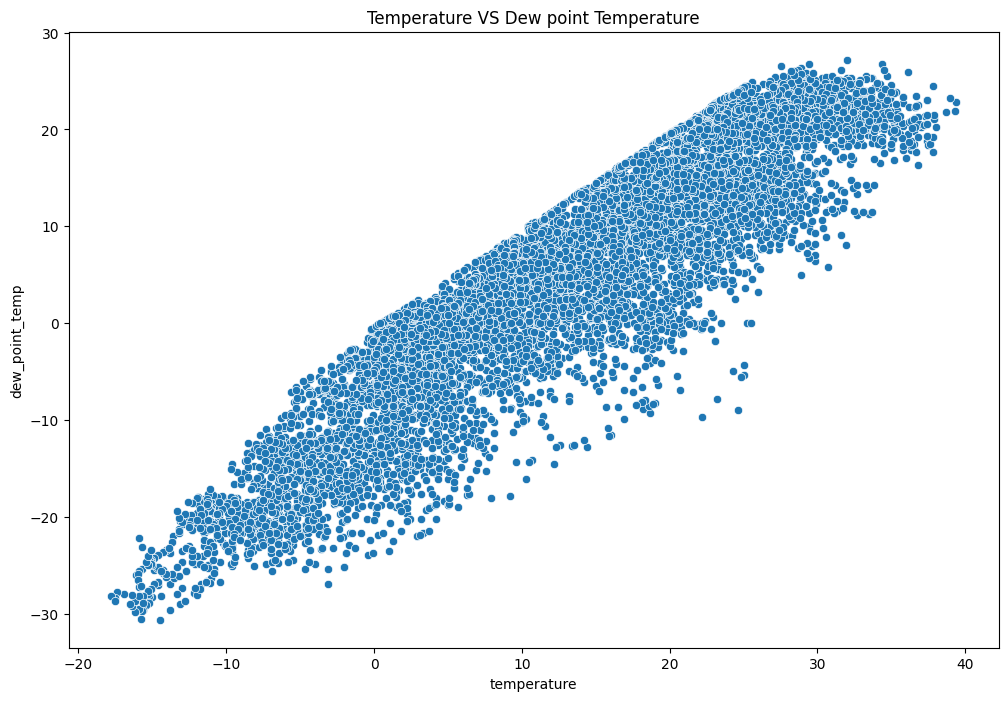

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# We see that the temperature and dew temperature are highly correlated

# Scatter plot to visualize the relationship between
# temperature and dew point temperature
plt.figure(figsize=(12,8))
sns.scatterplot(x='temperature',y='dew_point_temp',data=df)
plt.xlabel('temperature')
plt.ylabel('dew_point_temp')
plt.title('Temperature VS Dew point Temperature')

In [ ]:
# correlation
df[['temperature','dew_point_temp']].corr()

temperature  dew_point_temp
temperature        1.000000        0.912798
dew_point_temp     0.912798        1.000000

In [ ]:
# Creating new temperature column with 50% of both temp
df['temp'] = 0.5*df['temperature'] + 0.5*df['dew_point_temp']

#### 2. Feature Selection

In [ ]:

# Select your features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['rented_bike_count','temperature','dew_point_temp']]
features

['date',
 'humidity',
 'wind_speed',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'seasons',
 'holiday',
 'func_day',
 'weekend',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'visibility_0',
 'visibility_1',
 'visibility_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'day_of_week_7',
 'temp']

In [ ]:
#remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
continuous_variables = ['temperature', 'humidity', 'wind_speed', 'dew_point_temp', 'solar_radiation', 'temp']

In [ ]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [ ]:
continuous_feature_df

temperature  humidity  wind_speed  dew_point_temp  solar_radiation  \
0            -5.2        37         2.2           -17.6              0.0   
1            -5.5        38         0.8           -17.6              0.0   
2            -6.0        39         1.0           -17.7              0.0   
3            -6.2        40         0.9           -17.6              0.0   
4            -6.0        36         2.3           -18.6              0.0   
...           ...       ...         ...             ...              ...   
8755          4.2        34         2.6           -10.3              0.0   
8756          3.4        37         2.3            -9.9              0.0   
8757          2.6        39         0.3            -9.9              0.0   
8758          2.1        41         1.0            -9.8              0.0   
8759          1.9        43         1.3            -9.3              0.0   

       temp  
0    -11.40  
1    -11.55  
2    -11.85  
3    -11.90  
4    -12.30  
...     ...  
8755  -3.05  
8756  -3.25  
8757  -3.65  
8758  -3.85  
8759  -3.70  

[8760 rows x 6 columns]

In [ ]:
calc_vif(df[[i for i in continuous_feature_df]])

variables       VIF
0      temperature       inf
1         humidity  3.728151
2       wind_speed  4.486642
3   dew_point_temp       inf
4  solar_radiation  2.619125
5             temp       inf

In [ ]:
# Removing Temperature and dew point temperature
calc_vif(df[[i for i in continuous_feature_df if i not in ['dew_point_temp','temperature']]])

variables       VIF
0         humidity  3.539282
1       wind_speed  3.479585
2  solar_radiation  1.956713
3             temp  2.027904

In [ ]:
# dropping data, weekend, temperature and dew_point_temperature
df.drop(['date','weekend', 'dew_point_temp', 'temperature','seasons'],axis=1, inplace=True)

In [ ]:
# This is the final data for modeling
df.head()

rented_bike_count  humidity  wind_speed  solar_radiation  rainfall  \
0                254        37         2.2              0.0         0   
1                204        38         0.8              0.0         0   
2                173        39         1.0              0.0         0   
3                107        40         0.9              0.0         0   
4                 78        36         2.3              0.0         0   

   snowfall  holiday  func_day  hour_0  hour_1  ...  month_11  month_12  \
0         0        0         1       1       0  ...         0         1   
1         0        0         1       0       1  ...         0         1   
2         0        0         1       0       0  ...         0         1   
3         0        0         1       0       0  ...         0         1   
4         0        0         1       0       0  ...         0         1   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
0              0              0              0              0              1   
1              0              0              0              0              1   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              1   

   day_of_week_6  day_of_week_7   temp  
0              0              0 -11.40  
1              0              0 -11.55  
2              0              0 -11.85  
3              0              0 -11.90  
4              0              0 -12.30  

[5 rows x 55 columns]

##### What all feature selection methods have you used  and why?

We have used pearson correlation coefficient to check correlation between variables and also with dependent variable

And also we check the multicolinearity using VIF and remove those who are having high VIF value.

##### Which all features you found important and why?

From above methods we have found that there is high correlation between temperature and dew point temperature So, we take 50 % of the both and create new variable temp by adding both of them.

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

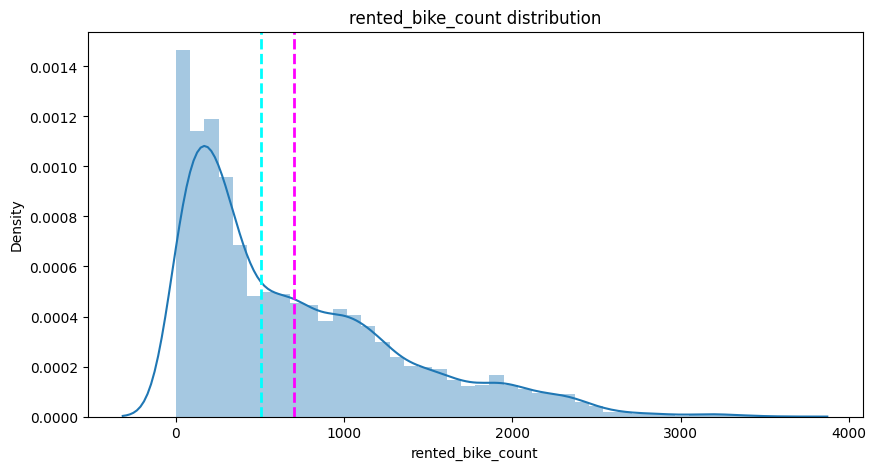

In [ ]:
# Transform Your data
# visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(10,5))
sns.distplot(df[dependent_variable])
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
# skew of the dependent variable
df[dependent_variable].skew()

rented_bike_count    1.153428
dtype: float64

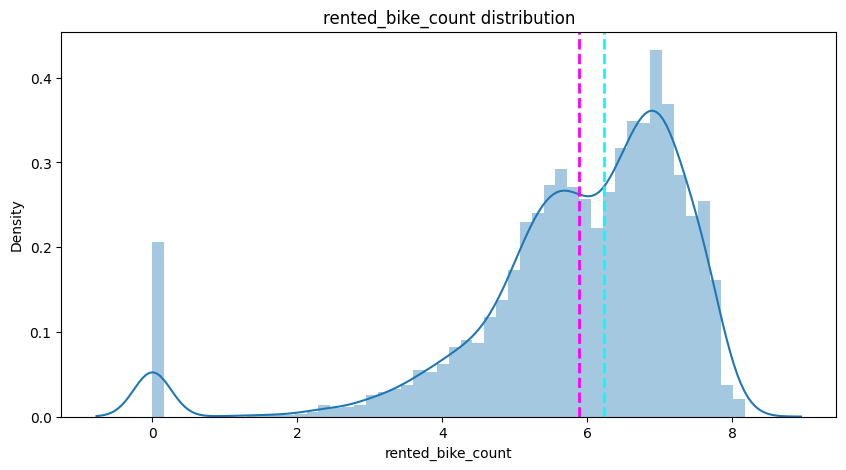

In [ ]:
# visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(10,5))
sns.distplot(np.log1p(df[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.log1p(df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
# skew of the dependent variable after log transformation
np.log1p(df[dependent_variable]).skew()

rented_bike_count   -1.832199
dtype: float64

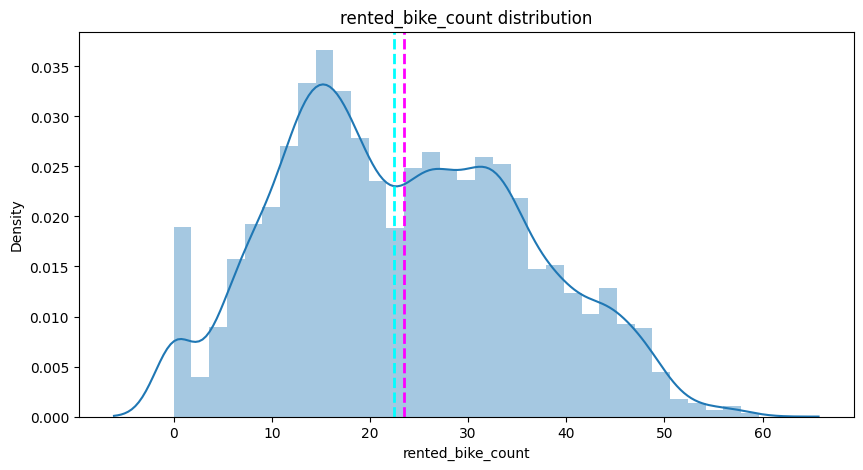

In [ ]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(df[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.sqrt(df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(df['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
# skew of the dependent variable after sqrt transformation
np.sqrt(df[dependent_variable]).skew()

rented_bike_count    0.237362
dtype: float64

In [ ]:
# Defining dependent and independent variables
X = df.drop('rented_bike_count',axis=1)
y = np.sqrt(df[dependent_variable])

In [ ]:
X

humidity  wind_speed  solar_radiation  rainfall  snowfall  holiday  \
0           37         2.2              0.0         0         0        0   
1           38         0.8              0.0         0         0        0   
2           39         1.0              0.0         0         0        0   
3           40         0.9              0.0         0         0        0   
4           36         2.3              0.0         0         0        0   
...        ...         ...              ...       ...       ...      ...   
8755        34         2.6              0.0         0         0        0   
8756        37         2.3              0.0         0         0        0   
8757        39         0.3              0.0         0         0        0   
8758        41         1.0              0.0         0         0        0   
8759        43         1.3              0.0         0         0        0   

      func_day  hour_0  hour_1  hour_2  ...  month_11  month_12  \
0            1       1       0       0  ...         0         1   
1            1       0       1       0  ...         0         1   
2            1       0       0       1  ...         0         1   
3            1       0       0       0  ...         0         1   
4            1       0       0       0  ...         0         1   
...        ...     ...     ...     ...  ...       ...       ...   
8755         1       0       0       0  ...         1         0   
8756         1       0       0       0  ...         1         0   
8757         1       0       0       0  ...         1         0   
8758         1       0       0       0  ...         1         0   
8759         1       0       0       0  ...         1         0   

      day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
8755              0              0              0              0   
8756              0              0              0              0   
8757              0              0              0              0   
8758              0              0              0              0   
8759              0              0              0              0   

      day_of_week_5  day_of_week_6  day_of_week_7   temp  
0                 1              0              0 -11.40  
1                 1              0              0 -11.55  
2                 1              0              0 -11.85  
3                 1              0              0 -11.90  
4                 1              0              0 -12.30  
...             ...            ...            ...    ...  
8755              1              0              0  -3.05  
8756              1              0              0  -3.25  
8757              1              0              0  -3.65  
8758              1              0              0  -3.85  
8759              1              0              0  -3.70  

[8760 rows x 54 columns]

In [ ]:
features

['date',
 'humidity',
 'wind_speed',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'seasons',
 'holiday',
 'func_day',
 'weekend',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'visibility_0',
 'visibility_1',
 'visibility_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'day_of_week_7',
 'temp']

##We plot distribution plot and also we did normality test using shapiro wilk and we have found that our data is not normally distributed it needs transformation.

So, first we have calculate the skewness value and we have found that rented bike attribute is positively skewed so we used log transfomation but it affected negatively

So, we finally used square root transformation & now our data looks normally distrubuted & skewness is also reduced.

### 5. Data Scaling

In [ ]:
features = [i for i in df.columns if i not in ['rented_bike_count']]

In [ ]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

##### Which method have you used to scale you data and why?

In this we have different independent features of different scale so we have used standard scalar method to scale our independent features into one scale.

6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

##### What data splitting ratio have you used and why?

To train the model we have split the data into train and test using train_test_split method

We have split 80% of our data into train and 20% into test.

## ***7. ML Model Implementation***

In [ ]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 20 important features, and returns a list of the model scores'''

  # Squring the y test and and pred as we have used sqrt transformation
  y_t = np.square(y_test)
  y_p = np.square(y_pred)
  y_train2 = np.square(y_train)
  y_train_pred = np.square(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  mae=mean_absolute_error(y_t,y_p)
  rmse = np.sqrt(mse)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(18,6))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Count', fontsize=18)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances


  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(12,8))
  plt.title('Feature Importances (top 20) for '+str(model), fontsize = 18)
  plt.xlabel('Relative Importance')
  feat.nlargest(20).plot(kind='barh')


  model_score = [mse,mae,rmse,r2_train,r2,r2_adjusted]
  return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE','MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### ML Model - 1 Linear Regression

In [ ]:
# Import the LinearRegression class
reg = LinearRegression()

# Initialize an instance of the class
reg.fit(X_train, y_train)

# Fit the linear regression model to your training data
y_pred_li = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 88090.65909000415
RMSE : 296.80070601331823
MAE : 201.8068025396329
Train R2 : 0.784428200422006
Test R2 : 0.7895199410494631
Adjusted R2 :  0.7828222844888686


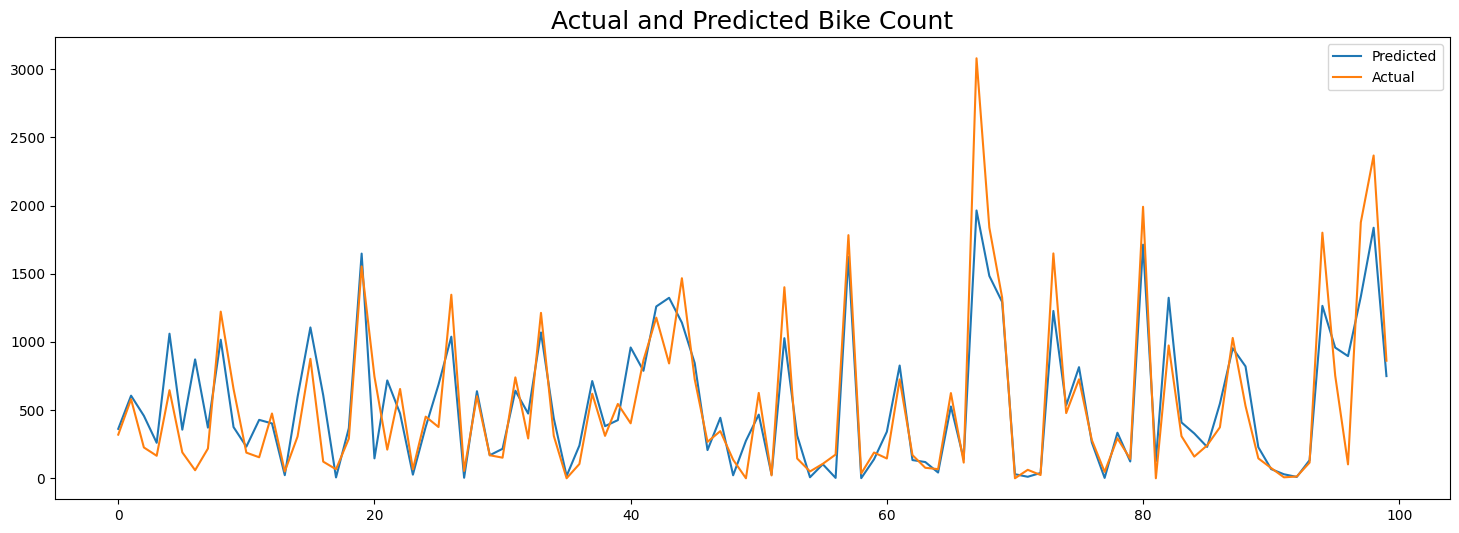

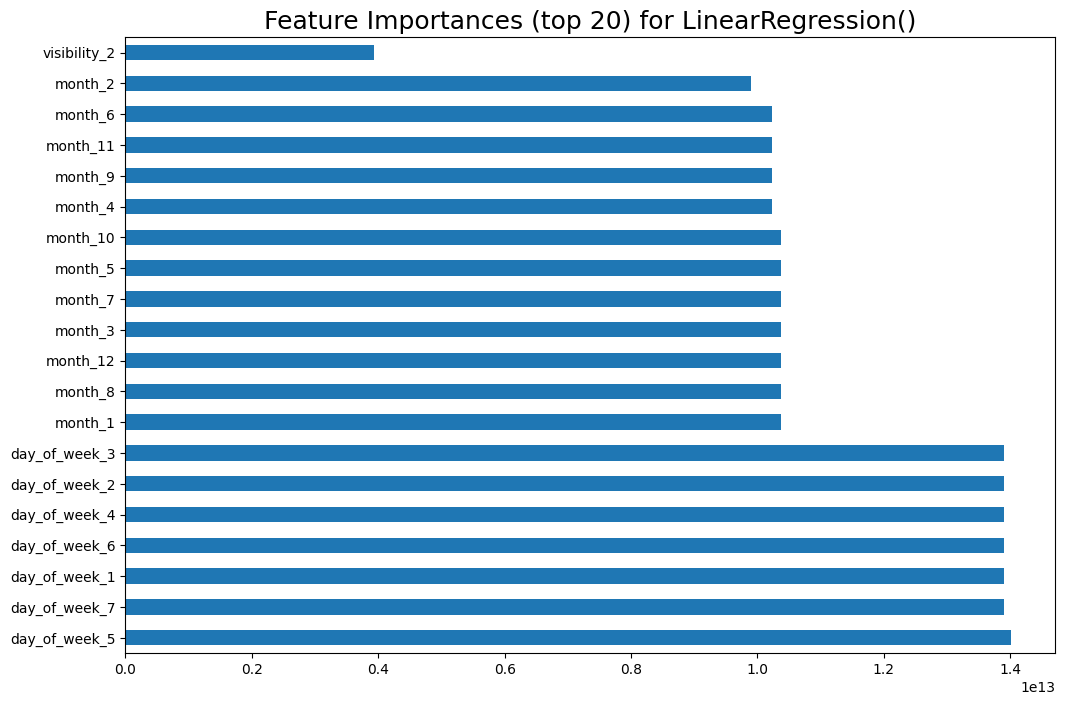

In [ ]:
linear_score = evaluate_model(reg, y_test,y_pred_li)
# Evaluation Metric Score chart
score['Linear regression'] = linear_score

In [ ]:
score

Linear regression
MSE               88090.659090
RMSE                201.806803
MAE                 296.800706
Train R2              0.784428
Test R2               0.789520
Adjusted R2           0.782822

So, using linear regression model we have got accuracy(i.e R2 score) around 78% on train data and same 78% on test data. Which seems to low to predict on unseen data, so we have decided to tune our model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [ ]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8030139022867928


In [ ]:
# use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 88090.65909000415
RMSE : 296.80070601331823
MAE : 201.8068025396329
Train R2 : 0.784428200422006
Test R2 : 0.7895199410494631
Adjusted R2 :  0.7828222844888686


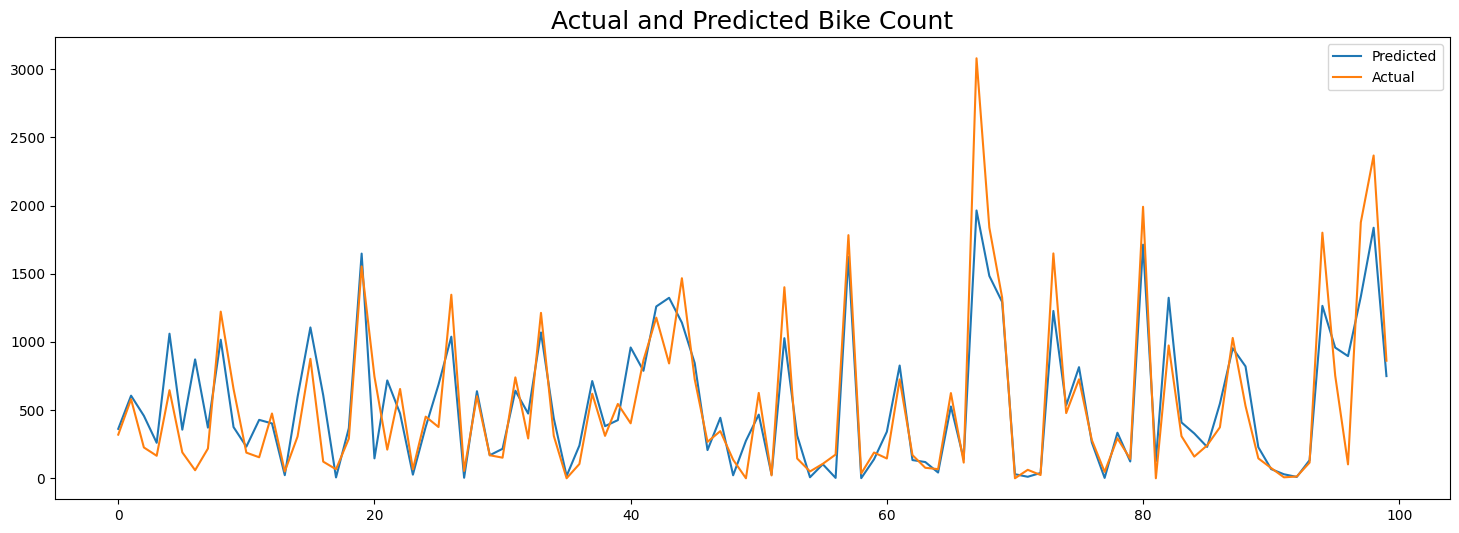

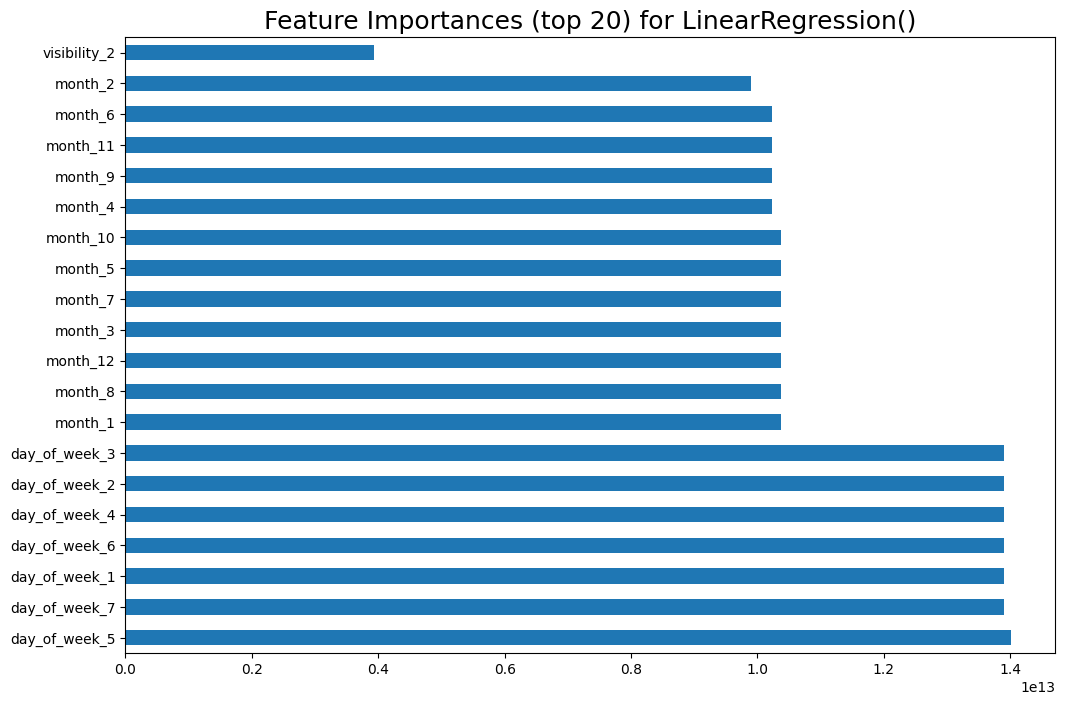

In [ ]:
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [ ]:
score['Linear regression tuned'] = linear_score2
score

Linear regression  Linear regression tuned
MSE               88090.659090             88090.659090
RMSE                201.806803               201.806803
MAE                 296.800706               296.800706
Train R2              0.784428                 0.784428
Test R2               0.789520                 0.789520
Adjusted R2           0.782822                 0.782822

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using GridSearchCV it has seen that there is no improvment in the model. There is no change in train R2 score.

So, we have decided to move ahead with next regression model.

### ML Model - 2 Lasso Regression

In [ ]:
# Import the Lasso Regression class
lasso = Lasso()

# Initialize an instance of the class
lasso.fit(X_train, y_train)

# Fit the lasso regression model to your training data
y_pred_lasso1 = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 199251.13943499743
RMSE : 446.37555873389556
MAE : 303.758212165632
Train R2 : 0.5201240107717402
Test R2 : 0.5239178363804666
Adjusted R2 :  0.5087684923407172


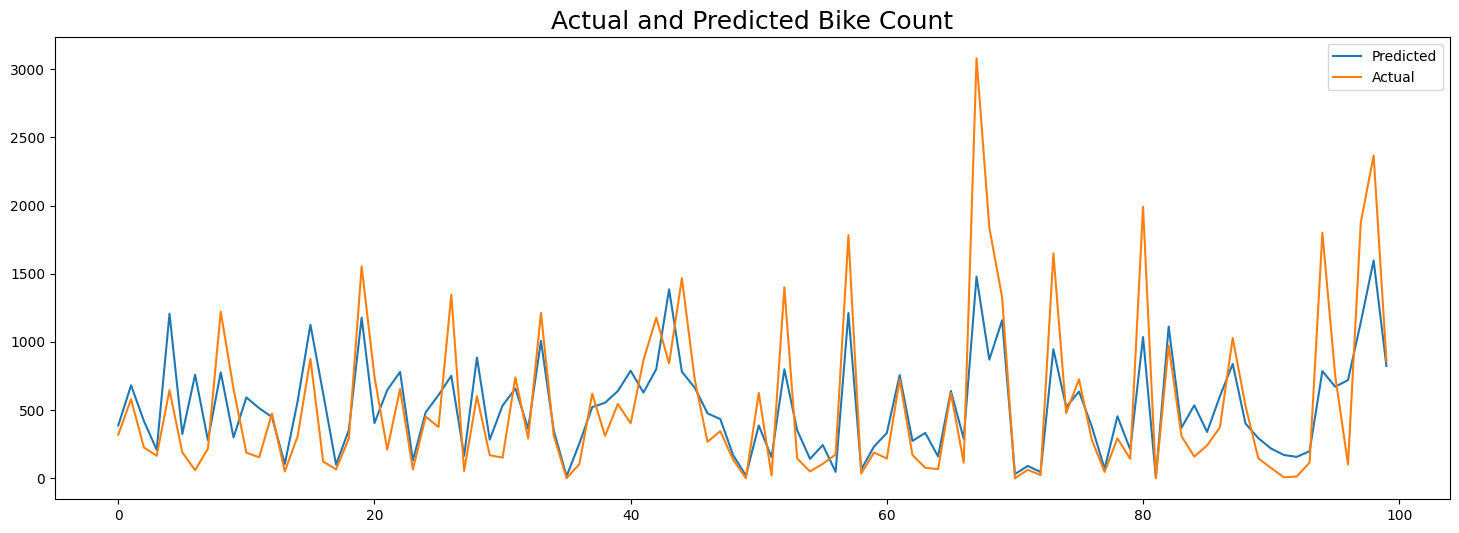

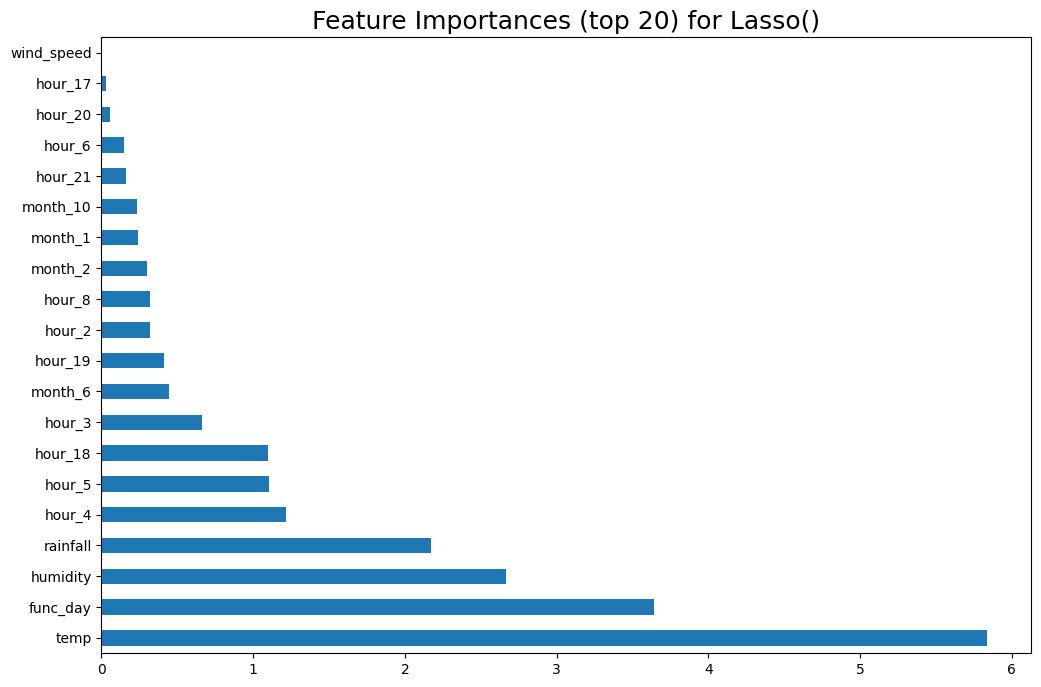

In [ ]:
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression
MSE               88090.659090             88090.659090     199251.139435
RMSE                201.806803               201.806803        303.758212
MAE                 296.800706               296.800706        446.375559
Train R2              0.784428                 0.784428          0.520124
Test R2               0.789520                 0.789520          0.523918
Adjusted R2           0.782822                 0.782822          0.508768

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#import Lasso regressor and grid search cv
lasso = Lasso()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -30.34188545869439


In [ ]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Initialize an instance of the class
lasso.fit(X_train, y_train)

# Fit the lasso regression model to your training data
y_pred_lassocv = lasso.predict(X_test)

MSE : 88358.33989461442
RMSE : 297.25130764155506
MAE : 201.70425481228804
Train R2 : 0.7834759534324424
Test R2 : 0.7888803559661375
Adjusted R2 :  0.7821623472579298


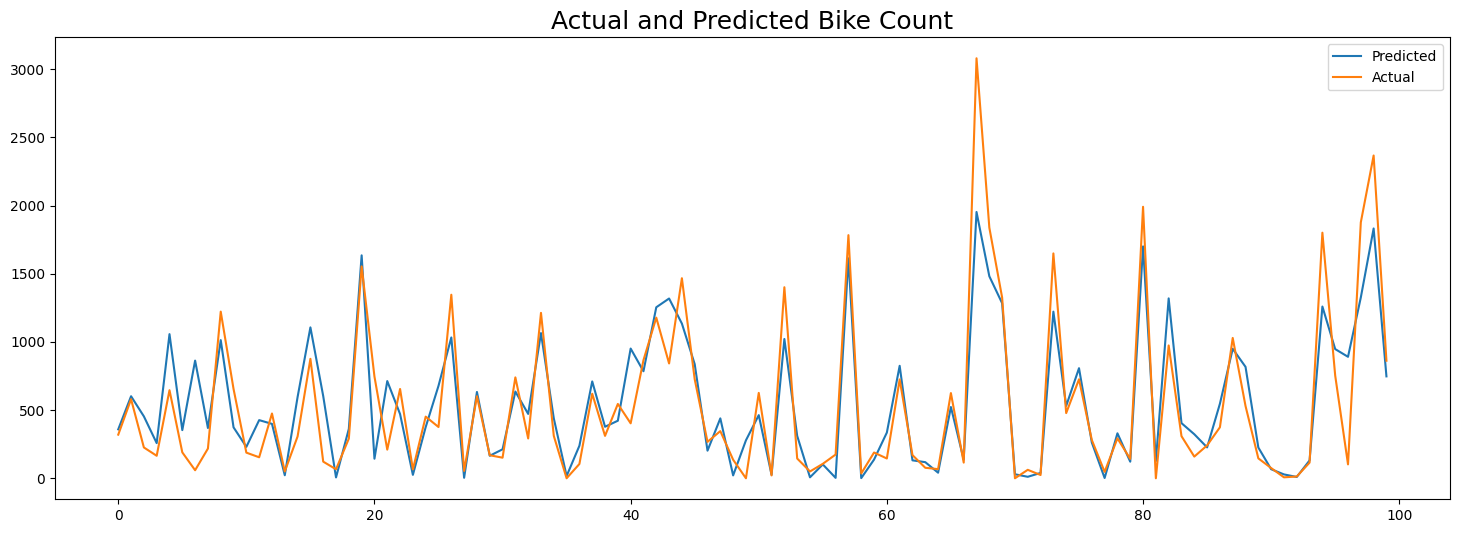

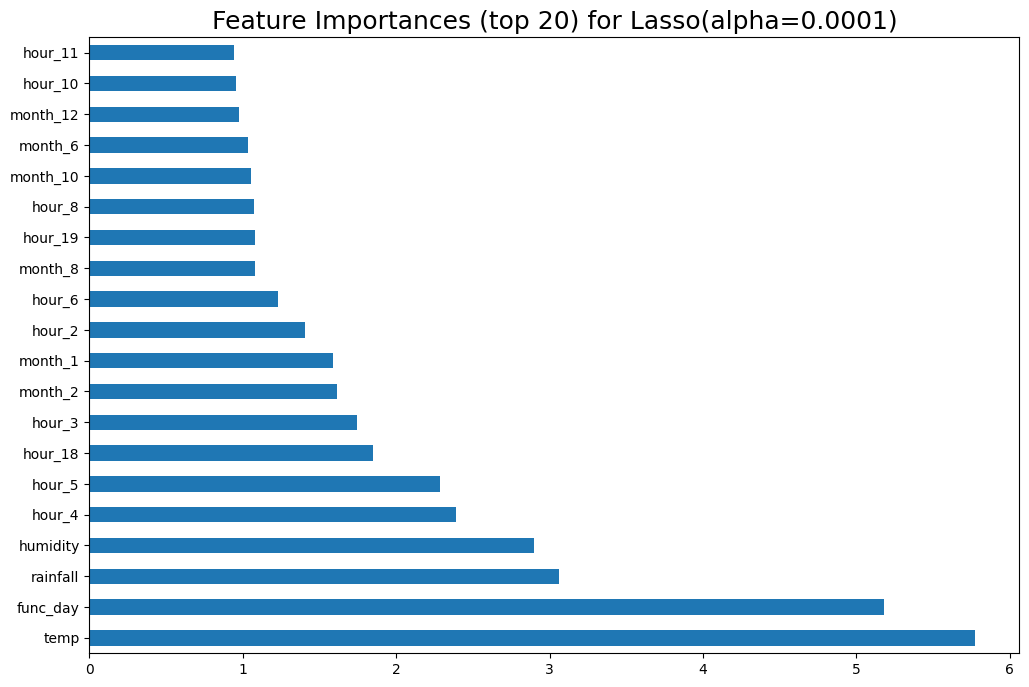

In [ ]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88090.659090             88090.659090     199251.139435   
RMSE                201.806803               201.806803        303.758212   
MAE                 296.800706               296.800706        446.375559   
Train R2              0.784428                 0.784428          0.520124   
Test R2               0.789520                 0.789520          0.523918   
Adjusted R2           0.782822                 0.782822          0.508768   

             Lasso with alpha = 0.0001  
MSE                       88358.339895  
RMSE                        201.704255  
MAE                         297.251308  
Train R2                      0.783476  
Test R2                       0.788880  
Adjusted R2                   0.782162

After tuning we have seen that there is increse in performance from 52% to 78%

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

RMSE & MSE are measuring the average squared values between the predicted and actual values.

Whereas R2 score is a measure how well the model fits the data.

In a business context, a low RMSE and high R2 score would indicate that the model is making accurate predictions and is a good fit for the data. This would be desirable for a business because it would mean that the model is able to provide useful insights and make accurate predictions about future outcomes.

### ML Model - 3 Ridge Regression

In [ ]:
# Ridge regressor class
ridge = Ridge()

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 88365.68734453894
RMSE : 297.26366637135277
MAE : 201.717161005283
Train R2 : 0.7834601310784806
Test R2 : 0.788862800283058
Adjusted R2 :  0.7821442329379108


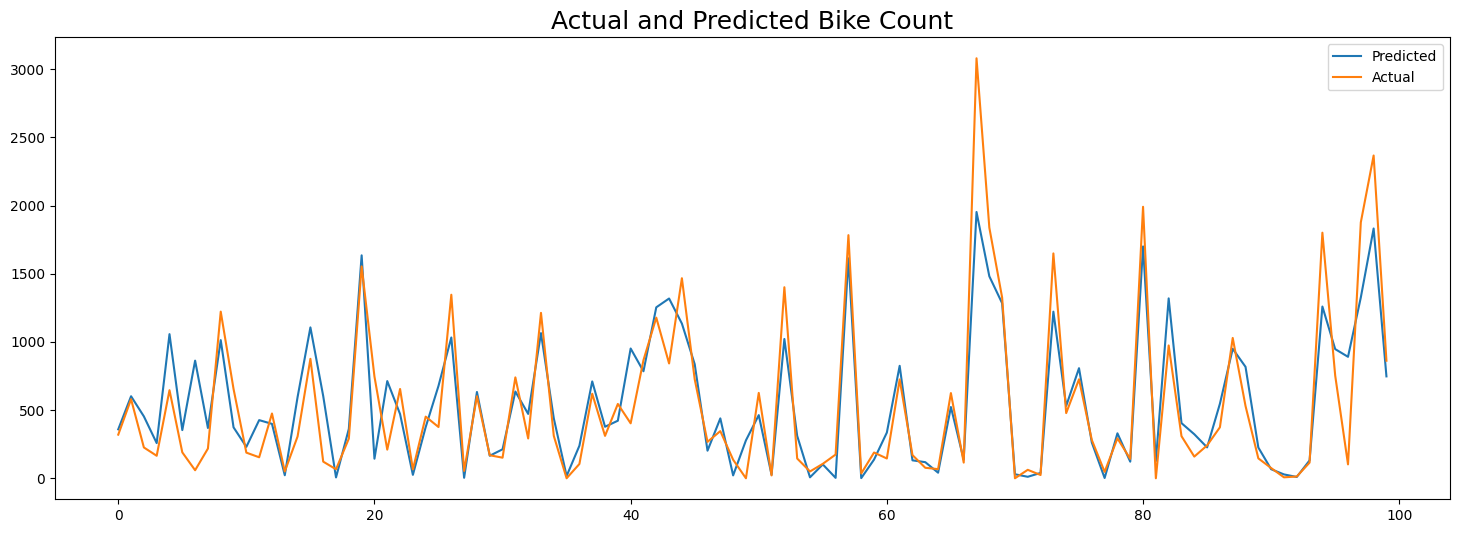

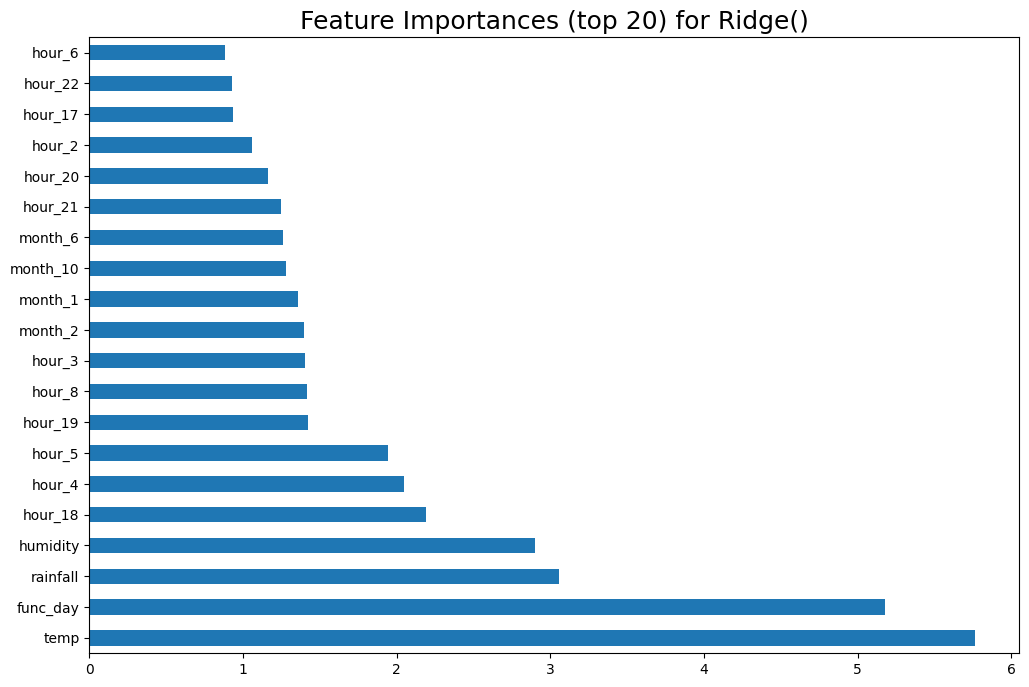

In [ ]:
# Evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88090.659090             88090.659090     199251.139435   
RMSE                201.806803               201.806803        303.758212   
MAE                 296.800706               296.800706        446.375559   
Train R2              0.784428                 0.784428          0.520124   
Test R2               0.789520                 0.789520          0.523918   
Adjusted R2           0.782822                 0.782822          0.508768   

             Lasso with alpha = 0.0001         Ridge  
MSE                       88358.339895  88365.687345  
RMSE                        201.704255    201.717161  
MAE                         297.251308    297.263666  
Train R2                      0.783476      0.783460  
Test R2                       0.788880      0.788863  
Adjusted R2                   0.782162      0.782144

We have used Ridge regression technique to check the performance of the model and we have found that there is no significant difference in between linear regression and Ridge

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Import Ridge regressor Class
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -30.341486749976816


In [ ]:
# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)


MSE : 88416.84817480511
RMSE : 297.3497068685374
MAE : 201.78332256985254
Train R2 : 0.7833529276131157
Test R2 : 0.7887405587800244
Adjusted R2 :  0.7820181016050811


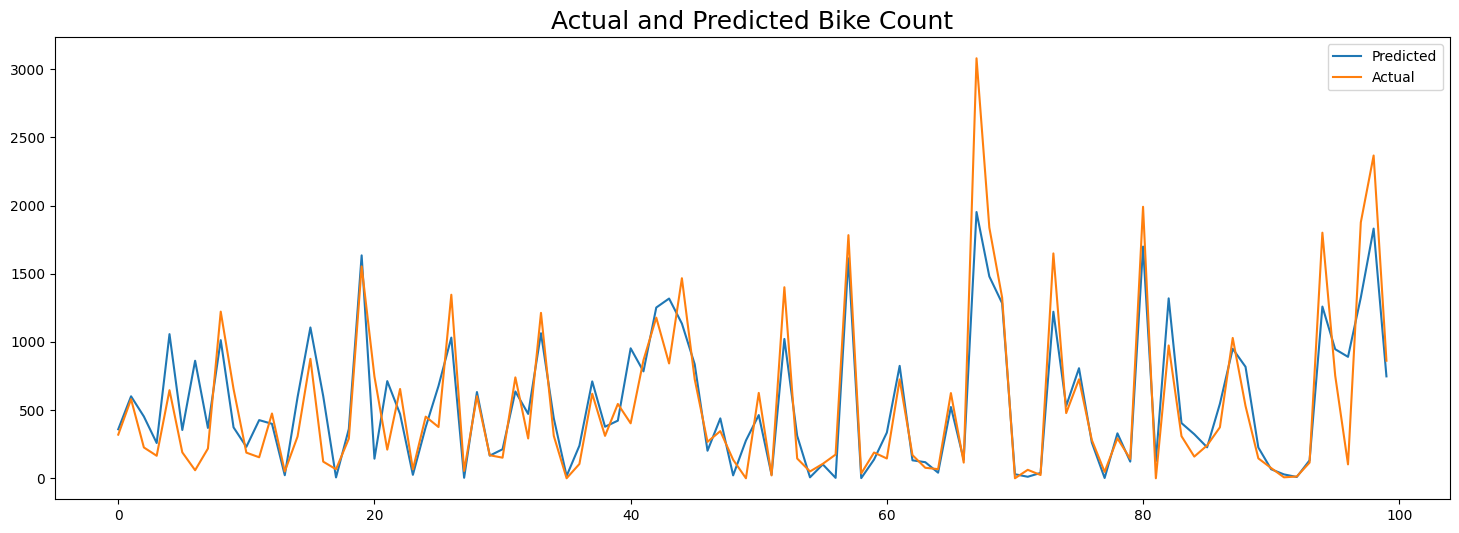

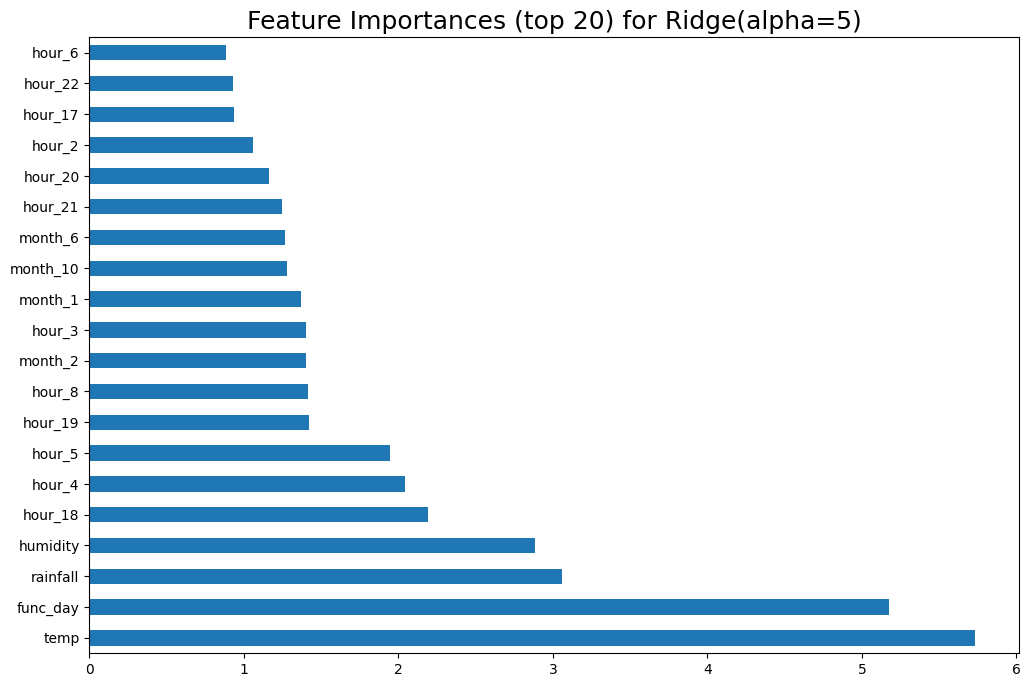

In [ ]:
#Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88090.659090             88090.659090     199251.139435   
RMSE                201.806803               201.806803        303.758212   
MAE                 296.800706               296.800706        446.375559   
Train R2              0.784428                 0.784428          0.520124   
Test R2               0.789520                 0.789520          0.523918   
Adjusted R2           0.782822                 0.782822          0.508768   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  
MSE                       88358.339895  88365.687345          88416.848175  
RMSE                        201.704255    201.717161            201.783323  
MAE                         297.251308    297.263666            297.349707  
Train R2                      0.783476      0.783460              0.783353  
Test R2                       0.788880      0.788863              0.788741  
Adjusted R2                   0.782162      0.782144              0.782018

We have tuned Ridge regression using hyperparametric technique & check the performance of the model and we have found that there is no significant difference in between tuned and without tuned.

It performs well only when there is multicolinearity or overfitting situation is present in our case we have already handle the multicolinearity situation, thats why it is not showing any difference in performance.

### ML Model - 4 : Xtreme Gradient Boosting Regressor

In [ ]:
# ML Model - 3 Implementation
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
# Fit the Algorithm
xgb_model.fit(X_train,y_train)
# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 30509.675256575534
RMSE : 174.67018994830096
MAE : 103.70351631526435
Train R2 : 0.9759196537311359
Test R2 : 0.9271014848463719
Adjusted R2 :  0.9247817913765451


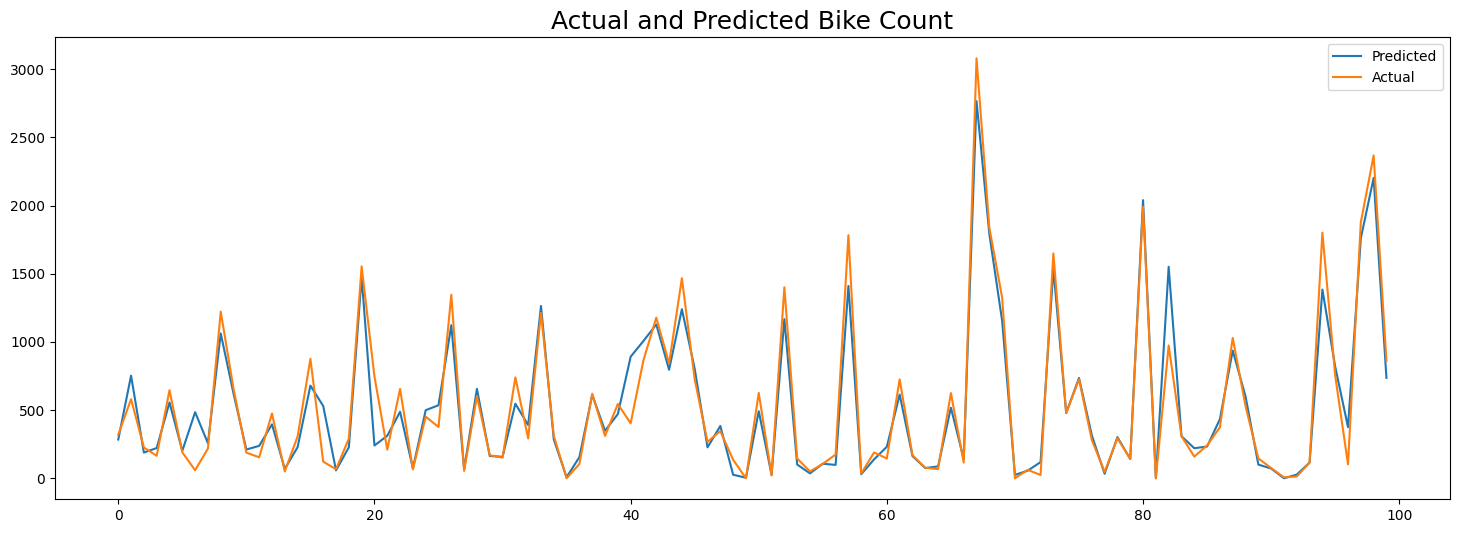

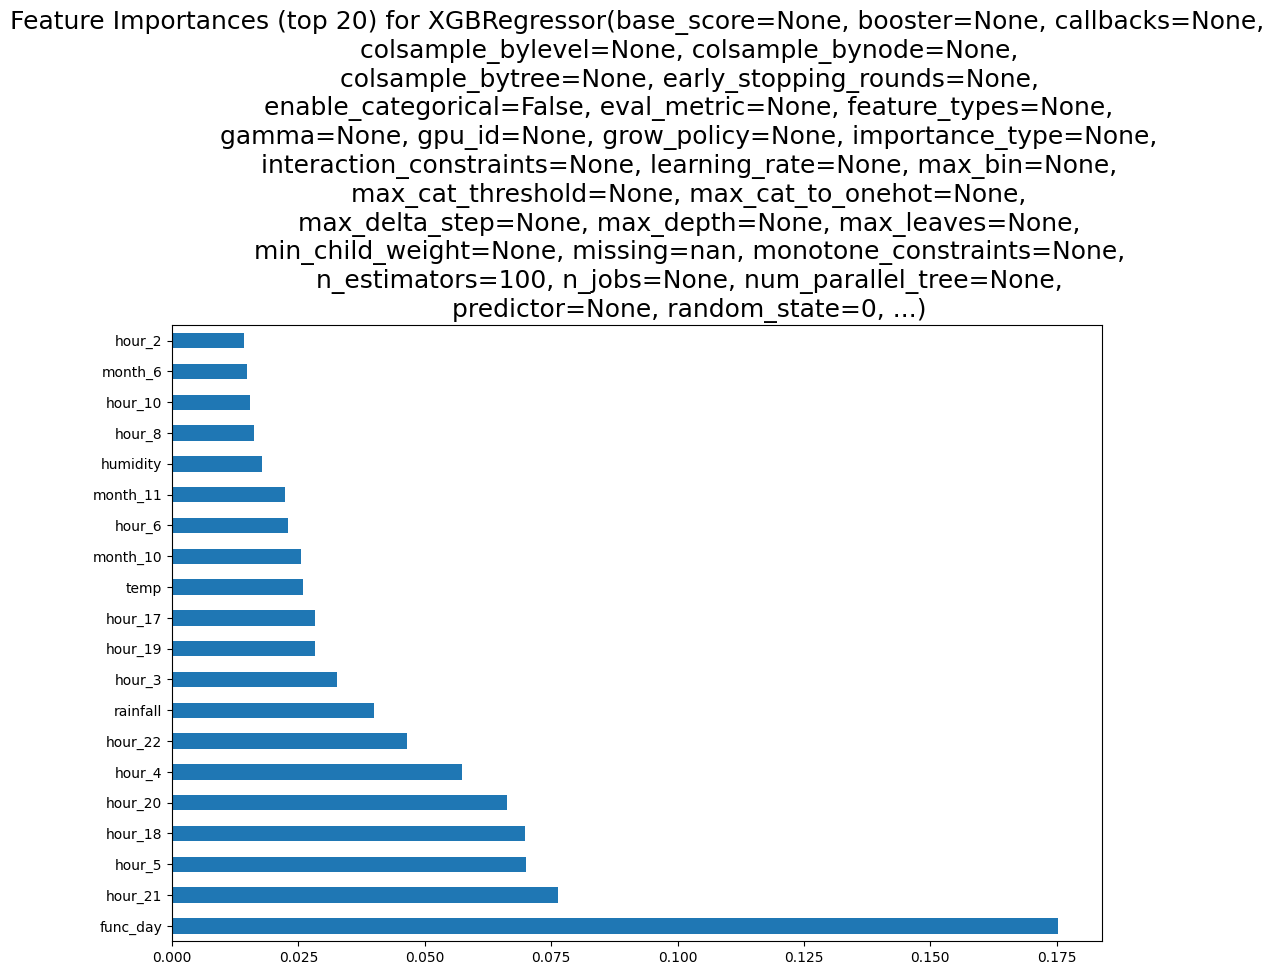

In [ ]:
# Evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Xtreme Gradient Boosting Regressor'] = result

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88090.659090             88090.659090     199251.139435   
RMSE                201.806803               201.806803        303.758212   
MAE                 296.800706               296.800706        446.375559   
Train R2              0.784428                 0.784428          0.520124   
Test R2               0.789520                 0.789520          0.523918   
Adjusted R2           0.782822                 0.782822          0.508768   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88358.339895  88365.687345          88416.848175   
RMSE                        201.704255    201.717161            201.783323   
MAE                         297.251308    297.263666            297.349707   
Train R2                      0.783476      0.783460              0.783353   
Test R2                       0.788880      0.788863              0.788741   
Adjusted R2                   0.782162      0.782144              0.782018   

             Xtreme Gradient Boosting Regressor  
MSE                                30509.675257  
RMSE                                 103.703516  
MAE                                  174.670190  
Train R2                               0.975920  
Test R2                                0.927101  
Adjusted R2                            0.924782

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# xg boost
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(20,22)}

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb_model = XGBRegressor()

xgb_params = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    # Add other XGBoost parameters you want to tune
}

xgb_search = RandomizedSearchCV(xgb_model, xgb_params, cv=6, scoring='neg_root_mean_squared_error', n_iter=100, n_jobs=-1)
xgb_search.fit(X_train, y_train)
xgb_best_params = xgb_search.best_params_

In [ ]:
# xg boost best parameters
xgb_best_params

{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}

In [ ]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             random_state=0)

In [ ]:
# fit
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [ ]:
# xtreme gradient boosting test predictions
y_pred_xgb = xgb_model.predict(X_test)

MSE : 27698.35217801024
RMSE : 166.4282192959182
MAE : 96.86621006437484
Train R2 : 0.996619306242254
Test R2 : 0.9338187401537802
Adjusted R2 :  0.9317127955269706


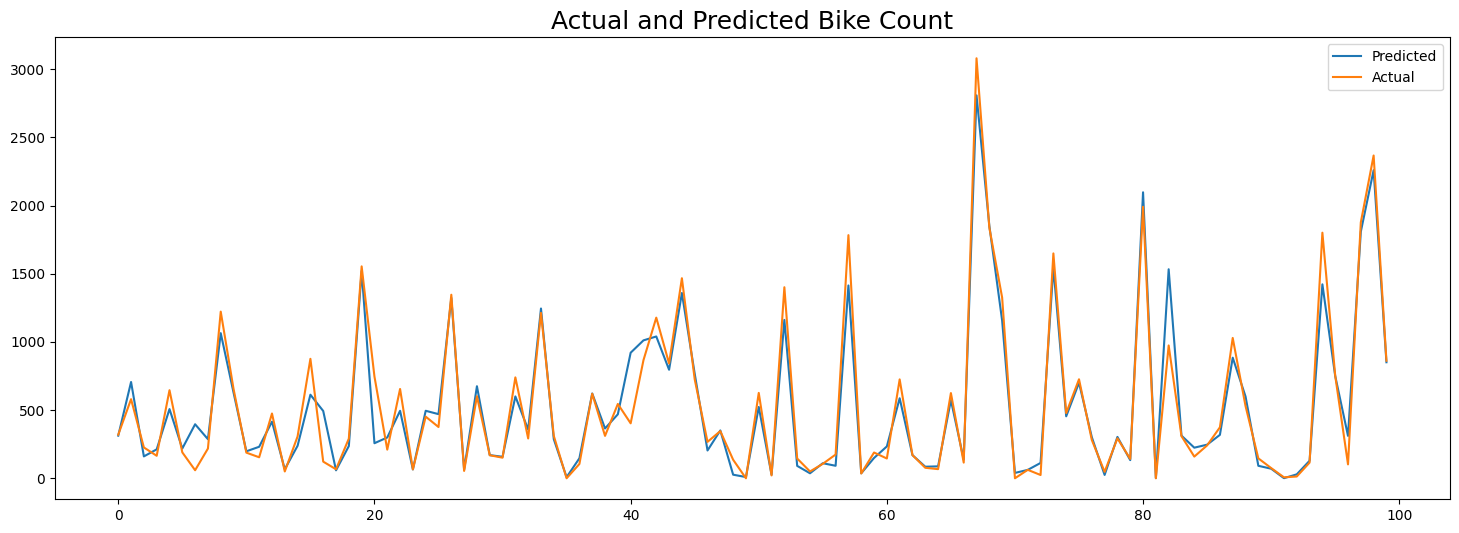

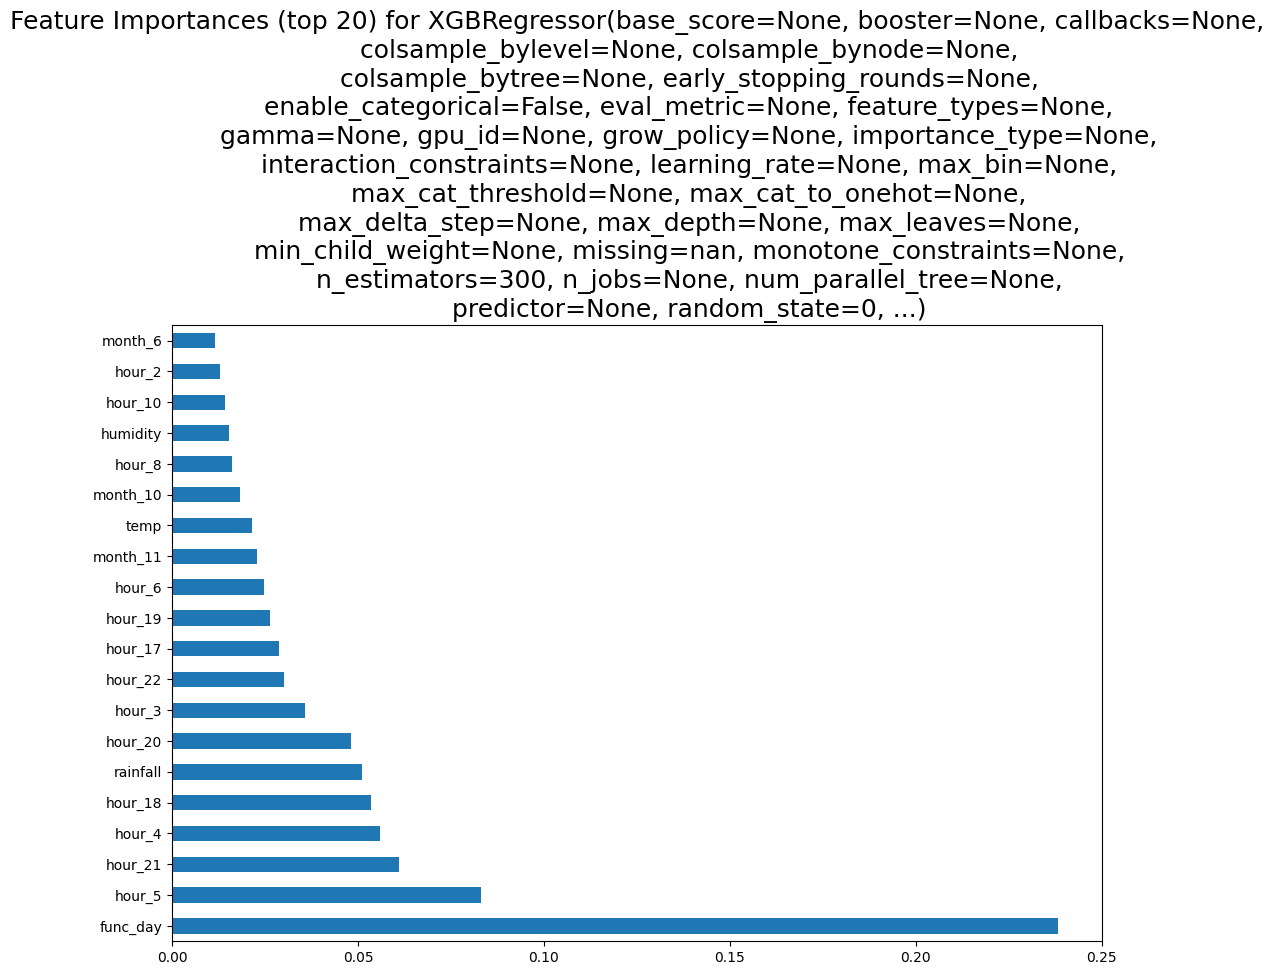

In [ ]:
#Evaluation matrices for XGBRegressor
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Xtreme Gradient Boosting Regressor Tuned'] = result

##### Which hyperparameter optimization technique have you used and why?

Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time we have decided to use Randomised search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88090.659090             88090.659090     199251.139435   
RMSE                201.806803               201.806803        303.758212   
MAE                 296.800706               296.800706        446.375559   
Train R2              0.784428                 0.784428          0.520124   
Test R2               0.789520                 0.789520          0.523918   
Adjusted R2           0.782822                 0.782822          0.508768   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88358.339895  88365.687345          88416.848175   
RMSE                        201.704255    201.717161            201.783323   
MAE                         297.251308    297.263666            297.349707   
Train R2                      0.783476      0.783460              0.783353   
Test R2                       0.788880      0.788863              0.788741   
Adjusted R2                   0.782162      0.782144              0.782018   

             Xtreme Gradient Boosting Regressor  \
MSE                                30509.675257   
RMSE                                 103.703516   
MAE                                  174.670190   
Train R2                               0.975920   
Test R2                                0.927101   
Adjusted R2                            0.924782   

             Xtreme Gradient Boosting Regressor Tuned  
MSE                                      27698.352178  
RMSE                                        96.866210  
MAE                                        166.428219  
Train R2                                     0.996619  
Test R2                                      0.933819  
Adjusted R2                                  0.931713

After tuning the model we have got accuracy on train data arround 99 % and 93% on test data which is very good.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

On the basis of all the model we have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have ran a several models like linear regression, lasso ,ridge  and xtreame gradient boosting but amongst them we have selected xtreame gradient boosting regressor (tuned) as we achieved 99% training accuracy and 93% testing accuracy.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

Popular techniques for model explainability:

LIME SHAP ELI-5 In this project I'll be using SHAP for model explainability. Among the various methods in SHAP I'll be using the SHAP summary plot, which plots features/columns in order of their impact on the predictions and also plots the SHAP values.

In [ ]:
#Installing the shap library
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.2 MB/s eta 0:00:00


In [ ]:
#Initialising javascript for visualisation of SHAP
import shap

In [ ]:
#Shap explainer for xgb (tree based)
explainer = shap.TreeExplainer(xgb_model, X_train, feature_names=features)

In [ ]:
shap.initjs()

# select an instance from the test set
instance = X_test[50, :]

# compute the SHAP values for the instance
shap_values = explainer(instance)

# create the SHAP force plot
shap.plots.force(shap_values)

The force plot shows the shap values for a particular instance.

Here we have considered the 50th index row values for the plot. We can see that the prediction is 22.87 (sqrt value). The different contribution of the columns is shown for getting the prediction.

In [ ]:
# get shap values of test data
shap_values = explainer(X_test)

 99%|===================| 1726/1752 [00:30<00:00]       

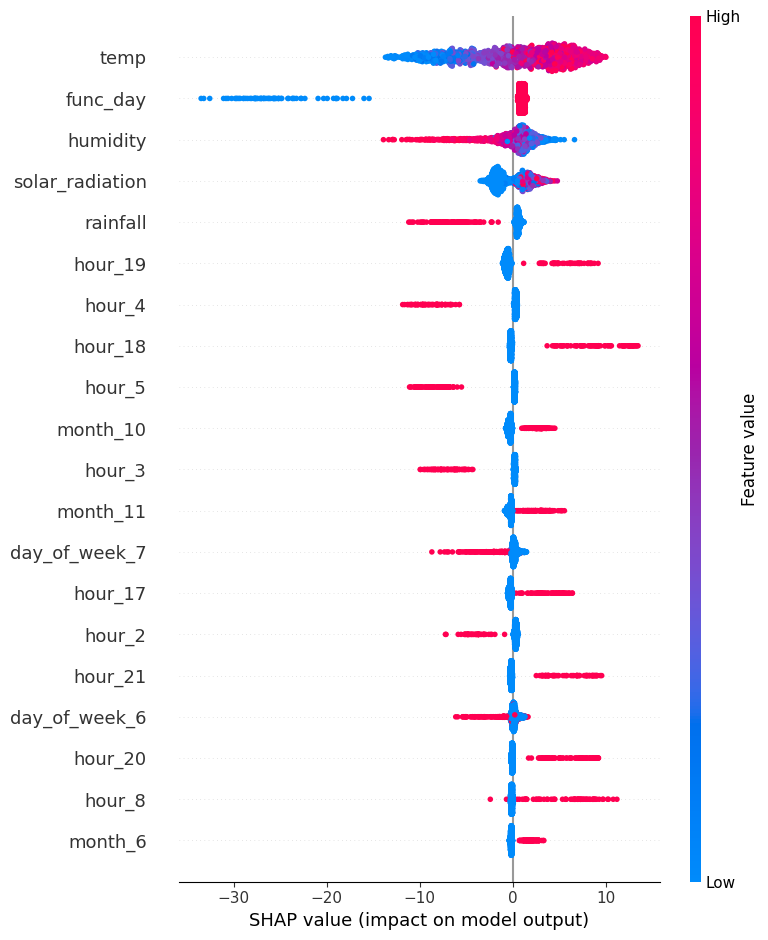

In [ ]:
shap.summary_plot(shap_values, X_test)

In the summary plot we can see the top 20 columns and their impact on the prediction. The red color indicates that the value of the columns is high and blue color shows that the value of the column is low.

For categorical columns, we have zeros and ones where zero is blue color and one is red color.

Shap values are also displayed and the impact on the prediction is also shown. towards the right hand side, the impact is positive (increases the predicted value) and towards the left hand side, the impace is negative (decreases the predicted value).

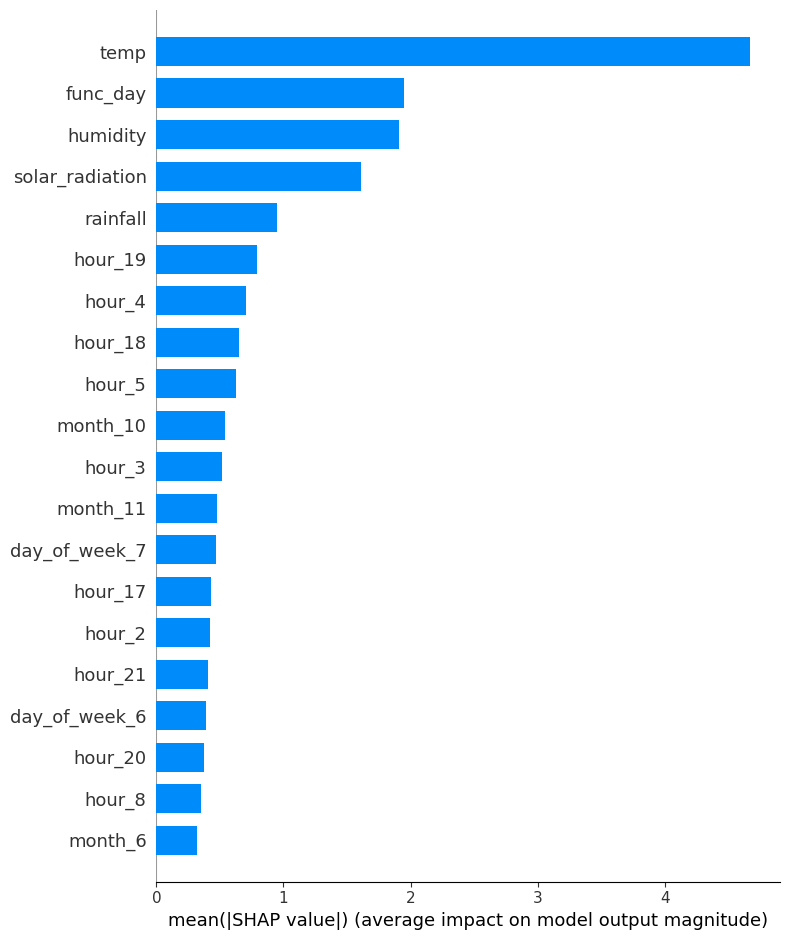

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

This bar plot shows the top 20 important features and the mean shap values. It shows the average impact on the model output magnitude.

It does not show the positive or negative impact on the prediction.

# **Conclusion**

The project successfully demonstrated the feasibility of using machine learning techniques to predict bike demand in Seoul.

Some of the key points are:-

> High demand in the morning and evening.

>Less Demand in the winter season.

>Highest demand in june.

>Found multicollinearity between temperature and dew point temperature.

>Perform linear regression, lasso , ridge and  Xtreme gradient boosting. & got highest accuracy i.e 99% on train and 93% on test on Xtreme gradient boosting.

>There is no use of removing outliers it affects negatively on model performance.

>Overall, the project highlights the potential of machine learning in solving real-world problems and provides a roadmap for future research in this area. The findings of this project can be extended to other cities with similar bike sharing systems, leading to more effective and efficient bike sharing operations, and better outcomes for all stakeholders.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***